In [17]:
import yt
#from yt.visualization.volume_rendering.api import Scene, VolumeSource
#from yt.utilities.amr_kdtree.api import AMRKDTree
#from yt.data_objects import *
import numpy as np
import sympy as sp

In [40]:
plot_num = 150
diag_num = 150
plot_num += 1000000
diag_num += 1000000
plot_num_list = list(str(plot_num))
diag_num_list = list(str(diag_num))
plot_num_list[0] = '0'
diag_num_list[0] = '0'
plotname = "plt"+"".join(plot_num_list)
diagname = "diag"+"".join(diag_num_list)


In [41]:
dplot = yt.load(plotname)
ddiag = yt.load(diagname)

yt : [INFO     ] 2022-12-07 08:08:48,879 Parameters: current_time              = 11.71875
yt : [INFO     ] 2022-12-07 08:08:48,880 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2022-12-07 08:08:48,880 Parameters: domain_left_edge          = [-10. -10. -10.]
yt : [INFO     ] 2022-12-07 08:08:48,881 Parameters: domain_right_edge         = [10. 10. 10.]
yt : [INFO     ] 2022-12-07 08:08:48,940 Parameters: current_time              = 11.71875
yt : [INFO     ] 2022-12-07 08:08:48,941 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2022-12-07 08:08:48,942 Parameters: domain_left_edge          = [-10. -10. -10.]
yt : [INFO     ] 2022-12-07 08:08:48,942 Parameters: domain_right_edge         = [10. 10. 10.]



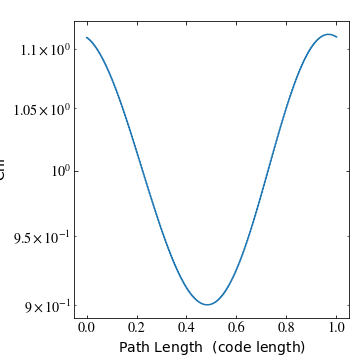


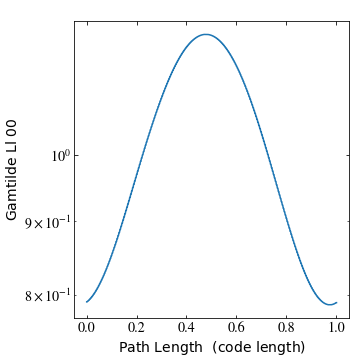

In [16]:
var = 'chi'
sl = yt.LinePlot(dplot, ('boxlib', var), (-0.5,0,0),(0.5,0,0), 512)
sl.show()

var = 'gamtilde_LL_00'
sl = yt.LinePlot(dplot, ('boxlib', var), (-0.5,0,0),(0.5,0,0), 512)
sl.show()

yt : [INFO     ] 2022-12-07 08:08:51,512 xlim = -10.000000 10.000000
yt : [INFO     ] 2022-12-07 08:08:51,512 ylim = -10.000000 10.000000
yt : [INFO     ] 2022-12-07 08:08:51,514 xlim = -10.000000 10.000000
yt : [INFO     ] 2022-12-07 08:08:51,514 ylim = -10.000000 10.000000
yt : [INFO     ] 2022-12-07 08:08:51,515 Making a fixed resolution buffer of (('boxlib', 'alpha')) 800 by 800



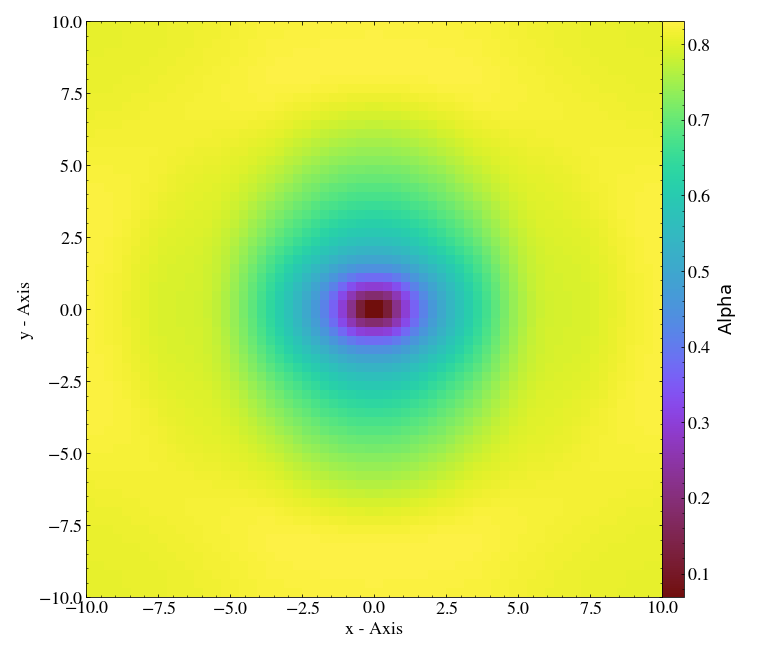

In [42]:
var = 'alpha'
s = yt.SlicePlot(dplot, 'y', ('boxlib', var), origin='native', center = [0,0,0])
s.set_log(('boxlib', var), False)
s.set_xlabel('x - Axis')
s.set_ylabel('y - Axis')
#s.set_zlim(('boxlib', var), 0.075, 0.6)
#s.hide_colorbar()
#s.hide_axes()
#s.annotate_grids(max_level = 4, min_level = 4, edgecolors='lightgray')
#s.set_cmap('alpha', 'RdBu_r')
s.zoom(1)
s.show()

In [32]:
ds = ddiag.sphere([0,0,0], radius = 150)

In [2]:
for i in range(1176,1180):
    ident = list(str(int(i)+10000))
    ident[0] = '0'
    #plotname = "plt00"+"".join(ident)
    diagname = "diag00"+"".join(ident)
    #dplot = yt.load(plotname)
    ddiag = yt.load(diagname)
    ds = ddiag.sphere([0,0,0], radius = 150)
    
    sc = yt.create_scene(ds,('boxlib', 'AbsAlpha'))
    sc.add_source(VolumeSource(ds,('boxlib', 'Psi4re')))
    source = sc[0]
    source2 = sc[1]
    
    source.tfh.set_log(True)
    source.tfh.set_bounds((0.1,0.8))
    
    source2.tfh.set_log(True)
    source2.tfh.set_bounds((0.0008,0.001))
    
    #sc.annotate_domain(dplot, color=[255, 255, 255, 0.1])
    
    #if i%5 == 0:
     #   sc.annotate_grids(dplot, alpha = 0.01, min_level = 2, max_level = 4)
    #else:
     #   sc.annotate_grids(dplot, alpha = 0.01, min_level = 2, max_level = 4)
        
    
    cam = sc.camera
    cam.resolution = 512
    normal_vector = [-0.6,1.0,-0.9]
    north_vector = [0.,0.,1.0]
    cam.switch_orientation(normal_vector=normal_vector, north_vector=north_vector)
    cam.zoom(6)
    ident2 = list(str(i+10000))
    ident2[0] = '0'
    dst = "img"+"".join(ident2)+".png"
    print(diagname)
    print(dst)
    sc.save(dst, sigma_clip=6)

yt : [INFO     ] 2021-05-05 11:28:56,155 Parameters: current_time              = 588.0
yt : [INFO     ] 2021-05-05 11:28:56,156 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2021-05-05 11:28:56,157 Parameters: domain_left_edge          = [-256. -256. -256.]
yt : [INFO     ] 2021-05-05 11:28:56,158 Parameters: domain_right_edge         = [256. 256. 256.]
yt : [INFO     ] 2021-05-05 11:28:57,888 Rendering scene (Can take a while).
yt : [INFO     ] 2021-05-05 11:28:57,890 Creating volume


diag0001176
img01176.png


yt : [INFO     ] 2021-05-05 11:30:23,496 Creating transfer function
yt : [INFO     ] 2021-05-05 11:31:09,948 Creating volume
/global/homes/a/ajpete87/.conda/envs/myenv/lib/python3.7/site-packages/yt/units/yt_array.py:1396: RuntimeWarning: invalid value encountered in log10
  out_arr = func(np.asarray(inp), out=out, **kwargs)
yt : [INFO     ] 2021-05-05 11:32:28,394 Creating transfer function
yt : [INFO     ] 2021-05-05 11:33:21,603 Saving render img01176.png
yt : [INFO     ] 2021-05-05 11:33:21,988 Parameters: current_time              = 588.5
yt : [INFO     ] 2021-05-05 11:33:21,989 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2021-05-05 11:33:21,990 Parameters: domain_left_edge          = [-256. -256. -256.]
yt : [INFO     ] 2021-05-05 11:33:21,991 Parameters: domain_right_edge         = [256. 256. 256.]
yt : [INFO     ] 2021-05-05 11:33:23,572 Rendering scene (Can take a while).
yt : [INFO     ] 2021-05-05 11:33:23,578 Creating volume


diag0001177
img01177.png


yt : [INFO     ] 2021-05-05 11:35:09,682 Creating transfer function
yt : [INFO     ] 2021-05-05 11:35:54,373 Creating volume
yt : [INFO     ] 2021-05-05 11:37:30,627 Creating transfer function
yt : [INFO     ] 2021-05-05 11:38:25,534 Saving render img01177.png
yt : [INFO     ] 2021-05-05 11:38:26,002 Parameters: current_time              = 589.0
yt : [INFO     ] 2021-05-05 11:38:26,003 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2021-05-05 11:38:26,004 Parameters: domain_left_edge          = [-256. -256. -256.]
yt : [INFO     ] 2021-05-05 11:38:26,005 Parameters: domain_right_edge         = [256. 256. 256.]
yt : [INFO     ] 2021-05-05 11:38:27,657 Rendering scene (Can take a while).
yt : [INFO     ] 2021-05-05 11:38:27,660 Creating volume


diag0001178
img01178.png


yt : [INFO     ] 2021-05-05 11:40:19,429 Creating transfer function
yt : [INFO     ] 2021-05-05 11:41:10,384 Creating volume
yt : [INFO     ] 2021-05-05 11:43:03,804 Creating transfer function
yt : [INFO     ] 2021-05-05 11:43:58,946 Saving render img01178.png
yt : [INFO     ] 2021-05-05 11:43:59,278 Parameters: current_time              = 589.5
yt : [INFO     ] 2021-05-05 11:43:59,279 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2021-05-05 11:43:59,280 Parameters: domain_left_edge          = [-256. -256. -256.]
yt : [INFO     ] 2021-05-05 11:43:59,281 Parameters: domain_right_edge         = [256. 256. 256.]
yt : [INFO     ] 2021-05-05 11:44:00,810 Rendering scene (Can take a while).
yt : [INFO     ] 2021-05-05 11:44:00,812 Creating volume


diag0001179
img01179.png


yt : [INFO     ] 2021-05-05 11:46:00,403 Creating transfer function
yt : [INFO     ] 2021-05-05 11:46:42,325 Creating volume
yt : [INFO     ] 2021-05-05 11:48:17,453 Creating transfer function
yt : [INFO     ] 2021-05-05 11:49:08,588 Saving render img01179.png


In [ ]:
sc = yt.create_scene(ds,('boxlib', 'AbsAlpha'))
sc.add_source(VolumeSource(ds,('boxlib', 'Psi4re')))
source = sc[0]
source2 = sc[1]

source.tfh.set_log(True)
source.tfh.set_bounds((0.1,0.8))

source2.tfh.set_log(True)
source2.tfh.set_bounds((0.0008,0.001))
#source2.tfh.set_bounds((0.015,0.025))

#tf = yt.ColorTransferFunction((0.6,0.7))

#tf.add_layers(5)
#source2.tfh.tf = tf

#sc.annotate_domain(dplot, color=[1,1,1,0.01])
#sc.annotate_grids(dplot, alpha = 0.01, min_level = 1, max_level = 1)
#sc.annotate_axes(alpha=0.1)
cam = sc.camera
cam.resolution
normal_vector = [-0.6,1.0,-0.9]
north_vector = [0.,0.,1.0]
cam.switch_orientation(normal_vector=normal_vector, north_vector=north_vector)
cam.zoom(10)
sc.show(sigma_clip=6)

In [80]:
r = 50
M = 0.9894
NumTheta = 50
NumPhi = 50
hTheta = np.pi/NumTheta
hPhi = 2*np.pi/NumPhi

for l in range(751,781):
    current_time = (l-r)/M
    plot_num = l
    diag_num = plot_num
    plot_num += 1000000
    diag_num += 1000000
    plot_num_list = list(str(plot_num))
    diag_num_list = list(str(diag_num))
    plot_num_list[0] = '0'
    diag_num_list[0] = '0'
    #plotname = "plt"+"".join(plot_num_list)
    diagname = "diag"+"".join(diag_num_list)
    
    #dplot = yt.load(plotname)
    ddiag = yt.load(diagname)
    d = ddiag.r
    integralre = 0
    integralre2 = 0
    integralim = 0
    integralim2 = 0
    for i in range(NumTheta+1):
        for j in range(NumPhi+1):
            theta = i*hTheta
            phi = j*hPhi
            xpt = r*np.sin(theta)*np.cos(phi)
            ypt = r*np.sin(theta)*np.sin(phi)
            zpt = r*np.cos(theta)
            pt = d[xpt,ypt,zpt]
            valptre = float(str(pt[('boxlib','Psi4re')][0])[0:-14])
            valptim = float(str(pt[('boxlib','Psi4im')][0])[0:-14])
            
            factorTheta = (i == 0)*1/3 + (i == NumTheta)*1/3 + (i%2 == 0)*(i != 0)*(i != NumTheta)*2/3 + (i%2 == 1)*4/3
            factorPhi = (j == 0)*1/3 + (j == NumPhi)*1/3 + (j%2 == 0)*(j != 0)*(j != NumPhi)*2/3 + (j%2 == 1)*4/3
        
            integralre += (r/M)*np.sqrt(5/(4*np.pi))*(np.cos(theta/2)**4)*(np.cos(2*phi)*valptre + np.sin(2*phi)*valptim)*np.sin(theta)*hTheta*hPhi*factorTheta*factorPhi
            integralim += (r/M)*np.sqrt(5/(4*np.pi))*(np.cos(theta/2)**4)*(np.sin(2*phi)*valptre - np.cos(2*phi)*valptim)*np.sin(theta)*hTheta*hPhi*factorTheta*factorPhi
                
    valrelist.append(integralre)
    valimlist.append(integralim)
    timelist.append(current_time)
    print(integralre)
    print(integralim)
    print(" "+str(current_time)+" "+str(l))

yt : [INFO     ] 2021-05-01 15:11:08,004 Parameters: current_time              = 375.5
yt : [INFO     ] 2021-05-01 15:11:08,005 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2021-05-01 15:11:08,006 Parameters: domain_left_edge          = [-256. -256. -256.]
yt : [INFO     ] 2021-05-01 15:11:08,006 Parameters: domain_right_edge         = [256. 256. 256.]
yt : [INFO     ] 2021-05-01 15:11:31,883 Parameters: current_time              = 376.0
yt : [INFO     ] 2021-05-01 15:11:31,884 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2021-05-01 15:11:31,885 Parameters: domain_left_edge          = [-256. -256. -256.]
yt : [INFO     ] 2021-05-01 15:11:31,885 Parameters: domain_right_edge         = [256. 256. 256.]


-0.0003004610612963343
0.0008470040599083577
 708.5102082069942 751


yt : [INFO     ] 2021-05-01 15:11:56,529 Parameters: current_time              = 376.5
yt : [INFO     ] 2021-05-01 15:11:56,530 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2021-05-01 15:11:56,531 Parameters: domain_left_edge          = [-256. -256. -256.]
yt : [INFO     ] 2021-05-01 15:11:56,531 Parameters: domain_right_edge         = [256. 256. 256.]


-0.0003359548247293778
0.0008341087130389899
 709.5209217707702 752


yt : [INFO     ] 2021-05-01 15:12:21,009 Parameters: current_time              = 377.0
yt : [INFO     ] 2021-05-01 15:12:21,010 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2021-05-01 15:12:21,010 Parameters: domain_left_edge          = [-256. -256. -256.]
yt : [INFO     ] 2021-05-01 15:12:21,011 Parameters: domain_right_edge         = [256. 256. 256.]


-0.00037089659608643635
0.0008184663081644354
 710.5316353345462 753


yt : [INFO     ] 2021-05-01 15:12:44,383 Parameters: current_time              = 377.5
yt : [INFO     ] 2021-05-01 15:12:44,384 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2021-05-01 15:12:44,385 Parameters: domain_left_edge          = [-256. -256. -256.]
yt : [INFO     ] 2021-05-01 15:12:44,386 Parameters: domain_right_edge         = [256. 256. 256.]


-0.00040286183610551297
0.0008069580830547027
 711.5423488983223 754


yt : [INFO     ] 2021-05-01 15:13:08,468 Parameters: current_time              = 378.0
yt : [INFO     ] 2021-05-01 15:13:08,469 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2021-05-01 15:13:08,469 Parameters: domain_left_edge          = [-256. -256. -256.]
yt : [INFO     ] 2021-05-01 15:13:08,470 Parameters: domain_right_edge         = [256. 256. 256.]


-0.0004338016779078277
0.0007977875078347894
 712.5530624620983 755


yt : [INFO     ] 2021-05-01 15:13:32,082 Parameters: current_time              = 378.5
yt : [INFO     ] 2021-05-01 15:13:32,083 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2021-05-01 15:13:32,084 Parameters: domain_left_edge          = [-256. -256. -256.]
yt : [INFO     ] 2021-05-01 15:13:32,085 Parameters: domain_right_edge         = [256. 256. 256.]


-0.0004631068294816567
0.0007857223870675499
 713.5637760258743 756


yt : [INFO     ] 2021-05-01 15:13:56,206 Parameters: current_time              = 379.0
yt : [INFO     ] 2021-05-01 15:13:56,206 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2021-05-01 15:13:56,207 Parameters: domain_left_edge          = [-256. -256. -256.]
yt : [INFO     ] 2021-05-01 15:13:56,208 Parameters: domain_right_edge         = [256. 256. 256.]


-0.0004901163608324529
0.0007702844291186921
 714.5744895896503 757


yt : [INFO     ] 2021-05-01 15:14:21,845 Parameters: current_time              = 379.5
yt : [INFO     ] 2021-05-01 15:14:21,846 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2021-05-01 15:14:21,847 Parameters: domain_left_edge          = [-256. -256. -256.]
yt : [INFO     ] 2021-05-01 15:14:21,848 Parameters: domain_right_edge         = [256. 256. 256.]


-0.0005186750787207373
0.0007519078750851154
 715.5852031534264 758


yt : [INFO     ] 2021-05-01 15:14:46,623 Parameters: current_time              = 380.0
yt : [INFO     ] 2021-05-01 15:14:46,624 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2021-05-01 15:14:46,625 Parameters: domain_left_edge          = [-256. -256. -256.]
yt : [INFO     ] 2021-05-01 15:14:46,626 Parameters: domain_right_edge         = [256. 256. 256.]


-0.0005478824969680624
0.0007324567571291128
 716.5959167172024 759


yt : [INFO     ] 2021-05-01 15:15:12,060 Parameters: current_time              = 380.5
yt : [INFO     ] 2021-05-01 15:15:12,061 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2021-05-01 15:15:12,062 Parameters: domain_left_edge          = [-256. -256. -256.]
yt : [INFO     ] 2021-05-01 15:15:12,062 Parameters: domain_right_edge         = [256. 256. 256.]


-0.0005723442875420052
0.0007113573771776466
 717.6066302809784 760


yt : [INFO     ] 2021-05-01 15:15:37,081 Parameters: current_time              = 381.0
yt : [INFO     ] 2021-05-01 15:15:37,082 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2021-05-01 15:15:37,083 Parameters: domain_left_edge          = [-256. -256. -256.]
yt : [INFO     ] 2021-05-01 15:15:37,083 Parameters: domain_right_edge         = [256. 256. 256.]


-0.000592609306184229
0.0006907324400705877
 718.6173438447545 761


KeyboardInterrupt: 

In [47]:
file = open("Psi4re_22.txt", "w+")
for i in valrelist:
    file.write(str(i) + ', ')
file.close()

file = open("Psi4im_22.txt", "w+")
for i in valimlist:
    file.write(str(i) + ', ')
file.close()

file = open("time.txt", "w+")
for i in timelist:
    file.write(str(i) + ', ')
file.close()

In [40]:
len(valrelist)

0

In [28]:
for i in valrelist:
    print(str(1000*i) + ', ')

44.83394108664739, 
25.440399955558807, 
1.404802952640933, 
-19.900316547262488, 
-32.710488717470106, 
-34.68017482533363, 
-26.782723815347087, 
-12.481733073520974, 
3.320779669136022, 
15.833172232238294, 
21.953481380665178, 
21.026471098872427, 
14.338418181845233, 
4.597301702241911, 
-4.923450788250668, 
-11.535734052640674, 
-13.903999761440213, 
-12.025196431416026, 
-7.045923651872542, 
-0.857659814680492, 
4.579288811789498, 
7.880155493915035, 
8.48382141844692, 
6.613225735838572, 
3.171059755750234, 
-0.6141044329649213, 
-3.6393224928937786, 
-5.19362115035316, 
-5.047885353945782, 
-3.4945159739177694, 
-1.193520064753849, 
1.0785104695369534, 
2.7003313545702308, 
3.3084640245931904, 
2.8802358246937967, 
1.705215679985912, 
0.2385669999260418, 
-1.0671779512999489, 
-1.8671251215591378, 
-2.0080758058972408, 
-1.557883477646622, 
-0.7415570408680406, 
0.15038695203779348, 
0.8617648198693687, 
1.214782150109813, 
1.1671189686825199, 
0.8002329958264431, 
0.267876993

In [30]:
for i in valimlist:
    print(str(1000*i) + ', ')

21.910292853124492, 
39.15507457064732, 
43.481440972804684, 
35.10327799604081, 
18.12016508217958, 
-1.4545967270823328, 
-17.918710117995083, 
-27.108381780845615, 
-27.316089734609676, 
-19.714356055686572, 
-7.758450385016123, 
4.517971046499394, 
13.699195449303659, 
17.62058860197392, 
15.931453214931908, 
10.055206812596369, 
2.312609340921521, 
-4.903922377326382, 
-9.639564940655257, 
-10.904506486535029, 
-8.907986147356091, 
-4.760661285835728, 
0.07518503649202268, 
4.156333961816731, 
6.433514288026896, 
6.551139478979412, 
4.830683963615547, 
2.0151793291482503, 
-0.9481421840513737, 
-3.188617930934633, 
-4.1718677626727505, 
-3.8278163058085566, 
-2.463187527171158, 
-0.6089668034032403, 
1.128757868746637, 
2.268054858336319, 
2.5891411666458013, 
2.131699069476144, 
1.1405516008121241, 
-0.01906030001931435, 
-0.9842883316983653, 
-1.5127240554744568, 
-1.5343866079430715, 
-1.119651708493019, 
-0.4553966465644455, 
0.23007563654173238, 
0.7406396244228111, 
0.964576

In [29]:
for i in timelist:
    print(str(i) + ', ')

678.1888012937134, 
679.1995148574895, 
680.2102284212655, 
681.2209419850415, 
682.2316555488175, 
683.2423691125936, 
684.2530826763696, 
685.2637962401456, 
686.2745098039217, 
687.2852233676977, 
688.2959369314736, 
689.3066504952496, 
690.3173640590257, 
691.3280776228017, 
692.3387911865777, 
693.3495047503537, 
694.3602183141298, 
695.3709318779058, 
696.3816454416818, 
697.3923590054579, 
698.4030725692339, 
699.4137861330099, 
700.4244996967859, 
701.435213260562, 
702.445926824338, 
703.456640388114, 
704.4673539518901, 
705.4780675156661, 
706.4887810794421, 
707.4994946432181, 
708.5102082069942, 
709.5209217707702, 
710.5316353345462, 
711.5423488983223, 
712.5530624620983, 
713.5637760258743, 
714.5744895896503, 
715.5852031534264, 
716.5959167172024, 
717.6066302809784, 
718.6173438447545, 
719.6280574085305, 
720.6387709723065, 
721.6494845360825, 
722.6601980998586, 
723.6709116636346, 
724.6816252274106, 
725.6923387911867, 
726.7030523549627, 
727.7137659187387, 
728

In [11]:
plot_num = 1
diag_num = 1
plot_num += 1000000
diag_num += 1000000
plot_num_list = list(str(plot_num))
diag_num_list = list(str(diag_num))
plot_num_list[0] = '0'
diag_num_list[0] = '0'
plotname = "plt"+"".join(plot_num_list)
diagname = "diag"+"".join(diag_num_list)

dplot = yt.load(plotname)
ddiag = yt.load(diagname)

yt : [INFO     ] 2022-09-22 13:05:30,910 Parameters: current_time              = 4.0
yt : [INFO     ] 2022-09-22 13:05:30,910 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2022-09-22 13:05:30,911 Parameters: domain_left_edge          = [-512. -512. -512.]
yt : [INFO     ] 2022-09-22 13:05:30,912 Parameters: domain_right_edge         = [512. 512. 512.]
yt : [INFO     ] 2022-09-22 13:05:30,973 Parameters: current_time              = 4.0
yt : [INFO     ] 2022-09-22 13:05:30,973 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2022-09-22 13:05:30,974 Parameters: domain_left_edge          = [-512. -512. -512.]
yt : [INFO     ] 2022-09-22 13:05:30,975 Parameters: domain_right_edge         = [512. 512. 512.]


In [12]:
print(dplot.field_list)
print('\n')
print(ddiag.field_list)

[('boxlib', 'Atilde_LL_00'), ('boxlib', 'Atilde_LL_01'), ('boxlib', 'Atilde_LL_02'), ('boxlib', 'Atilde_LL_11'), ('boxlib', 'Atilde_LL_12'), ('boxlib', 'Atilde_LL_22'), ('boxlib', 'Gamtilde_U_0'), ('boxlib', 'Gamtilde_U_1'), ('boxlib', 'Gamtilde_U_2'), ('boxlib', 'Khat'), ('boxlib', 'alpha'), ('boxlib', 'beta_U_0'), ('boxlib', 'beta_U_1'), ('boxlib', 'beta_U_2'), ('boxlib', 'chi'), ('boxlib', 'gamtilde_LL_00'), ('boxlib', 'gamtilde_LL_01'), ('boxlib', 'gamtilde_LL_02'), ('boxlib', 'gamtilde_LL_11'), ('boxlib', 'gamtilde_LL_12'), ('boxlib', 'gamtilde_LL_22'), ('boxlib', 'theta')]


[('boxlib', 'C'), ('boxlib', 'Csqrd'), ('boxlib', 'H'), ('boxlib', 'K'), ('boxlib', 'M'), ('boxlib', 'Rsclr'), ('boxlib', 'Z'), ('boxlib', 'gam_LL_00sqrd'), ('boxlib', 'gamtilde_LL_00sqrd'), ('boxlib', 'sqrtKsqrd')]


yt : [INFO     ] 2022-09-22 13:06:20,684 xlim = -512.000000 512.000000
yt : [INFO     ] 2022-09-22 13:06:20,685 ylim = -512.000000 512.000000
yt : [INFO     ] 2022-09-22 13:06:20,687 xlim = -512.000000 512.000000
yt : [INFO     ] 2022-09-22 13:06:20,688 ylim = -512.000000 512.000000
yt : [INFO     ] 2022-09-22 13:06:20,689 Making a fixed resolution buffer of (('boxlib', 'alpha')) 800 by 800



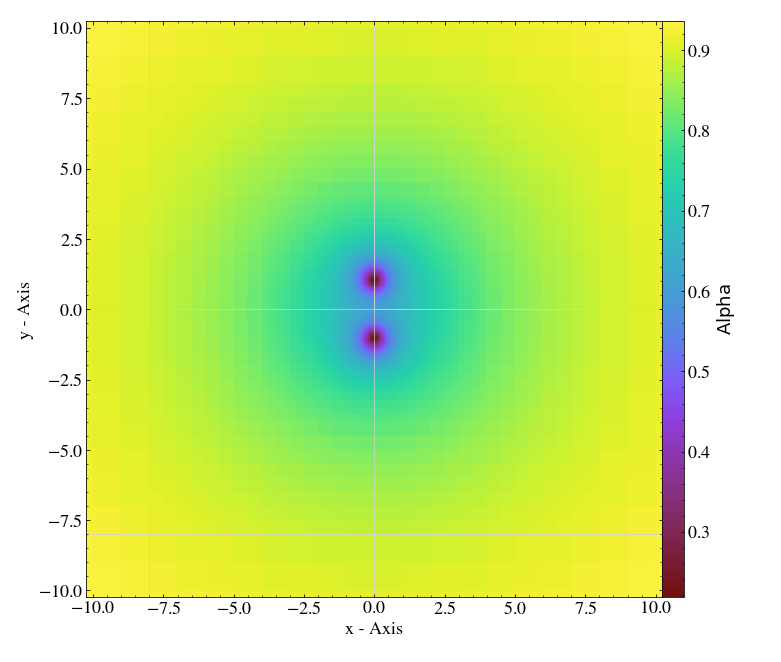

YTFieldNotFound: Could not find field ('boxlib', 'Psi4re') in diag0000001.

In [15]:
var = 'alpha'
s = yt.SlicePlot(dplot, 'x', ('boxlib', var), origin='native', center = [0,0,0])
s.set_log(('boxlib', var), False)
s.set_xlabel('x - Axis')
s.set_ylabel('y - Axis')
#s.set_zlim(('boxlib', var), 0.075, 0.6)
#s.hide_colorbar()
#s.hide_axes()
s.annotate_grids(max_level = 4, min_level = 4, edgecolors='lightgray')
#s.set_cmap('alpha', 'RdBu_r')
s.zoom(50)
s.show()

var = 'Psi4re'
s = yt.SlicePlot(ddiag, 'z', ('boxlib', var), origin='native', center = [0,0,0])
s.set_log(('boxlib', var), False)
s.set_xlabel('x - Axis')
s.set_ylabel('y - Axis')
s.set_zlim(('boxlib', var), zmin = 0, zmax = 0.001)
#s.hide_colorbar()
#s.hide_axes()
#s.annotate_grids()
#s.annotate_grids(max_level = 5, min_level = 5, edgecolors='lightgray')
#s.set_cmap('alpha', 'RdBu_r')
s.zoom(1)
s.show()

var = 'Psi4im'
s = yt.SlicePlot(ddiag, 'y', ('boxlib', var), origin='native', center = [0,0,0])
s.set_log(('boxlib', var), False)
s.set_xlabel('x - Axis')
s.set_ylabel('y - Axis')
s.set_zlim(('boxlib', var), zmin = -1e-3, zmax = 1e-3)
#s.hide_colorbar()
#s.hide_axes()
#s.annotate_grids()
#s.annotate_grids(max_level = 5, min_level = 5, edgecolors='lightgray')
#s.set_cmap('alpha', 'RdBu_r')
s.zoom(5)
s.show()

var = 'ModPsi4'
s = yt.SlicePlot(ddiag, 'z', ('boxlib', var), origin='native', center = [0,0,0])
s.set_log(('boxlib', var), False)
s.set_xlabel('x - Axis')
s.set_ylabel('y - Axis')
s.set_zlim(('boxlib', var), zmin = 0, zmax = 0.001)
#s.hide_colorbar()
#s.hide_axes()
#s.annotate_grids(max_level = 5, min_level = 5, edgecolors='lightgray')
#s.set_cmap('alpha', 'RdBu_r')
#s.annotate_grids()
s.zoom(2.5)
s.show()

var = 'Ksclr'
s = yt.SlicePlot(ddiag, 'z', ('boxlib', var), origin='native', center = [0,0,0])
s.set_log(('boxlib', var), False)
s.set_xlabel('x - Axis')
s.set_ylabel('y - Axis')
s.set_zlim(('boxlib', var), zmin = -0.001, zmax = 0.001)
#s.hide_colorbar()
#s.hide_axes()
#s.annotate_grids(max_level = 5, min_level = 5, edgecolors='lightgray')
#s.set_cmap('alpha', 'RdBu_r')
#s.annotate_grids()
s.zoom(5)
s.show()

49.994382

yt : [INFO     ] 2021-04-10 20:26:46,656 xlim = -512.000000 512.000000
yt : [INFO     ] 2021-04-10 20:26:46,657 ylim = -512.000000 512.000000
yt : [INFO     ] 2021-04-10 20:26:46,658 xlim = -512.000000 512.000000
yt : [INFO     ] 2021-04-10 20:26:46,659 ylim = -512.000000 512.000000
yt : [INFO     ] 2021-04-10 20:26:46,660 Making a fixed resolution buffer of (('boxlib', 'alpha')) 800 by 800
yt : [INFO     ] 2021-04-10 20:26:46,982 Making a fixed resolution buffer of (('boxlib', 'alpha')) 800 by 800



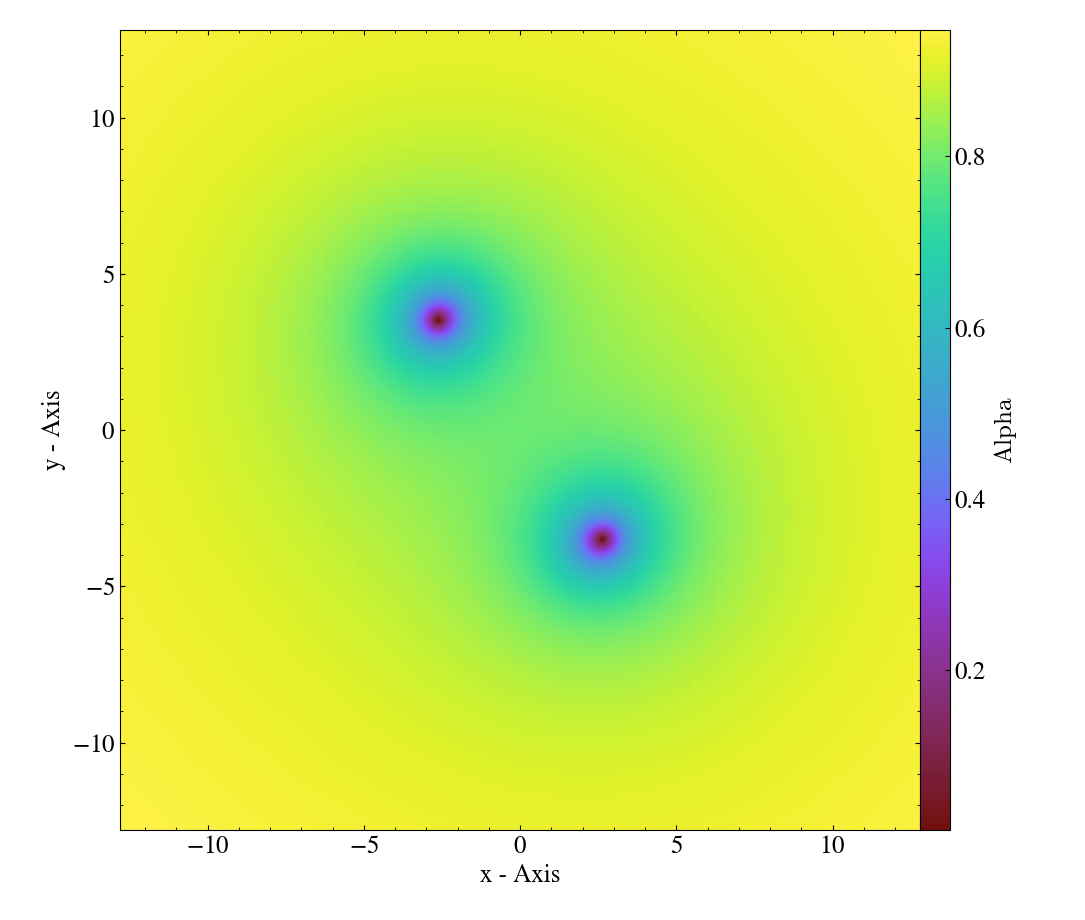

yt : [INFO     ] 2021-04-10 20:26:47,561 xlim = -512.000000 512.000000
yt : [INFO     ] 2021-04-10 20:26:47,562 ylim = -512.000000 512.000000
yt : [INFO     ] 2021-04-10 20:26:47,563 xlim = -512.000000 512.000000
yt : [INFO     ] 2021-04-10 20:26:47,564 ylim = -512.000000 512.000000
yt : [INFO     ] 2021-04-10 20:26:47,565 Making a fixed resolution buffer of (('boxlib', 'Khat')) 800 by 800
yt : [WARNING  ] 2021-04-10 20:26:47,790 Plot image for field ('boxlib', 'Khat') has both positive and negative values. Min = -0.001620, Max = 0.095216.
yt : [WARNING  ] 2021-04-10 20:26:47,790 Switching to symlog colorbar scaling unless linear scaling is specified later
yt : [INFO     ] 2021-04-10 20:26:48,238 Making a fixed resolution buffer of (('boxlib', 'Khat')) 800 by 800
yt : [WARNING  ] 2021-04-10 20:26:48,273 Plot image for field ('boxlib', 'Khat') has both positive and negative values. Min = -0.001777, Max = 0.396374.
yt : [WARNING  ] 2021-04-10 20:26:48,273 Switching to symlog colorbar sca


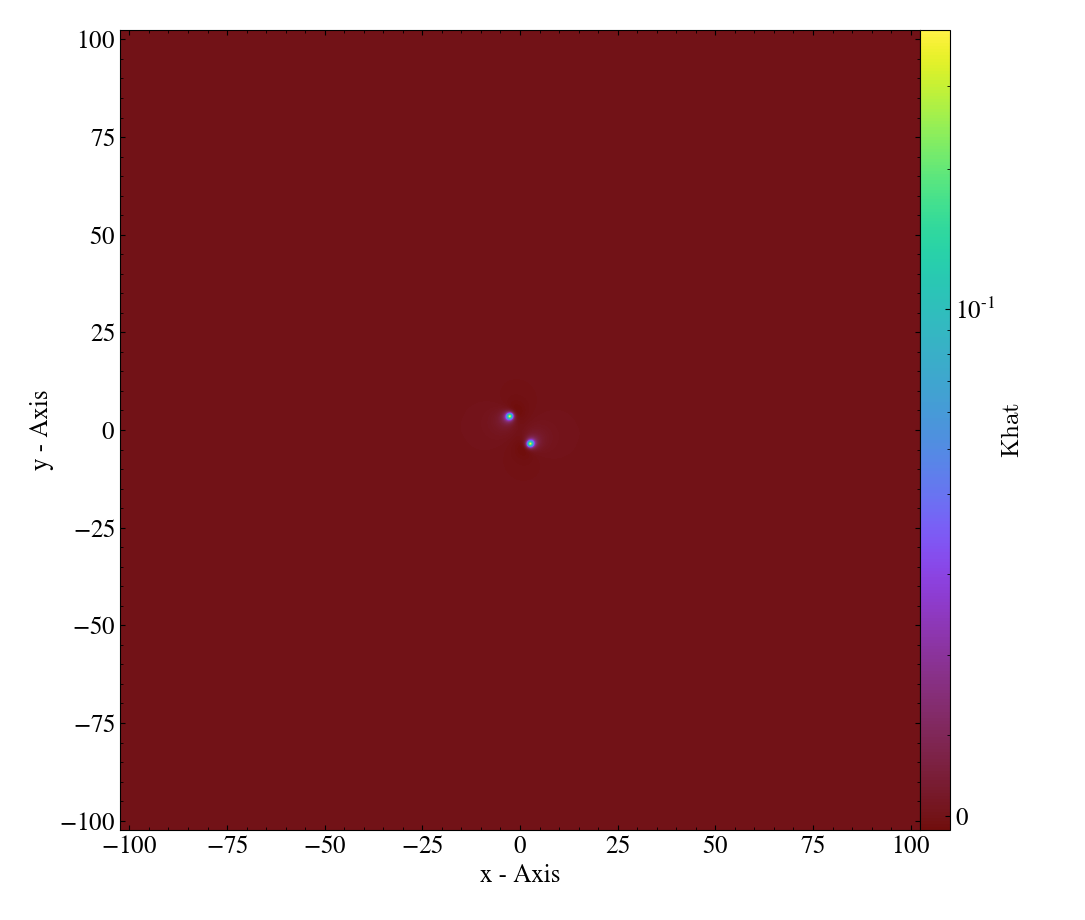

In [48]:
var = 'alpha'
s = yt.SlicePlot(dplot, 'z', ('boxlib', var), origin='native', center = [0,0,0])
s.set_log(('boxlib', var), False)
s.set_xlabel('x - Axis')
s.set_ylabel('y - Axis')
#s.set_zlim(('boxlib', var), 0.075, 0.6)
#s.hide_colorbar()
#s.hide_axes()
#s.annotate_grids()
#s.set_cmap('alpha', 'RdBu_r')
s.zoom(40)
s.show()

var = 'Khat'
s = yt.SlicePlot(dplot, 'z', ('boxlib', var), origin='native', center = [0,0,0])
s.set_log(('boxlib', var), True)
s.set_xlabel('x - Axis')
s.set_ylabel('y - Axis')
#s.set_zlim(('boxlib', var), zmin = 10e-10, zmax = 10e-1)
#s.hide_colorbar()
#s.hide_axes()
#s.annotate_grids(max_level = 5, min_level = 5, edgecolors='lightgray')
#s.set_cmap('alpha', 'RdBu_r')
s.zoom(5)
s.show()

In [ ]:

var = 'AbsKsclr'
s = yt.SlicePlot(ddiag, 'z', ('boxlib', var), origin='native', center = [0,0,0])
s.set_log(('boxlib', var), False)
s.set_xlabel('x - Axis')
s.set_ylabel('y - Axis')
#s.set_zlim(('boxlib', var), zmin = 10e-10, zmax = 10e-1)
#s.hide_colorbar()
#s.hide_axes()
#s.annotate_grids(max_level = 5, min_level = 5, edgecolors='lightgray')
#s.set_cmap('alpha', 'RdBu_r')
s.zoom(1)
s.show()

var = 'Psi4im'
s = yt.SlicePlot(ddiag, 'y', ('boxlib', var), origin='native', center = [0,0,0])
s.set_log(('boxlib', var), True)
s.set_xlabel('x - Axis')
s.set_ylabel('y - Axis')
#s.set_zlim(('boxlib', var), zmin = 10e-10, zmax = 10e-1)
#s.hide_colorbar()
#s.hide_axes()
#s.annotate_grids(max_level = 5, min_level = 5, edgecolors='lightgray')
#s.set_cmap('alpha', 'RdBu_r')
s.zoom(3)
s.show()

var = 'rPsi4Real'
s = yt.SlicePlot(ddiag, 'z', ('boxlib', var), origin='native', center = [0,0,0])
s.set_log(('boxlib', var), True)
s.set_xlabel('x - Axis')
s.set_ylabel('y - Axis')
s.set_zlim(('boxlib', var), zmin = 10e-6, zmax = 1)
#s.hide_colorbar()
#s.hide_axes()
#s.annotate_grids(max_level = 5, min_level = 5, edgecolors='lightgray')
#s.set_cmap('alpha', 'RdBu_r')
s.zoom(1.5)
s.show()

In [9]:
sc = yt.create_scene(ddiag,('boxlib', 'AbsAlpha'))
#sc.add_source(VolumeSource(ddiag,('boxlib', 'Psi4re')))
source = sc[0]
#source2 = sc[1]

source.tfh.set_bounds((0.3,0.8))

#source2.tfh.set_log(True)
#source2.tfh.set_bounds((0.0001,0.001))
#source2.tfh.set_bounds((0.015,0.025))

#tf = yt.ColorTransferFunction((0.6,0.7))

#tf.add_layers(5)
#source2.tfh.tf = tf

#sc.annotate_domain(dplot, color=[1,1,1,0.1])
#sc.annotate_grids(dplot, alpha = 0.01, min_level = 2, max_level = 4)
#sc.annotate_axes(alpha=0.1)
#cam = sc.camera
#cam.resolution
#normal_vector = [-0.6,1.0,-0.9]
#north_vector = [0.,0.,1.0]
#cam.switch_orientation(normal_vector=normal_vector, north_vector=north_vector)
#cam.zoom(6)
sc.show(sigma_clip=6)

yt : [INFO     ] 2021-04-28 12:58:03,858 Rendering scene (Can take a while).
yt : [INFO     ] 2021-04-28 12:58:03,860 Creating volume
yt : [INFO     ] 2021-04-28 12:58:59,021 Creating transfer function


RuntimeError: Support for the <ufunc 'clip'> ufunc with 3 inputs has not beenadded to YTArray.

<Scene Object>:
Sources: 
    source_00: <Volume Source>:YTRegion (diag0000700): , center=[0. 0. 0.] cm, left_edge=[-1024. -1024. -1024.] cm, right_edge=[1024. 1024. 1024.] cm transfer_function:None
Camera: 
    <Camera Object>:
	position:[1024. 1024. 1024.] code_length
	focus:[0. 0. 0.] code_length
	north_vector:[ 0.81649658 -0.40824829 -0.40824829]
	width:[3072. 3072. 3072.] code_length
	light:None
	resolution:(512, 512)
Lens: <Lens Object>:
	lens_type:plane-parallel
	viewpoint:[-1.77362091e+09 -1.77362091e+09 -1.77362091e+09] code_length

In [ ]:
sc = yt.create_scene(ddiag,('boxlib', 'AbsAlpha'))
sc.add_source(VolumeSource(ddiag,('boxlib', 'AbsKhat')))
source = sc[0]
source2 = sc[1]

source.tfh.set_bounds((0.3,0.8))

source2.tfh.set_log(True)
#source2.tfh.set_bounds((0.0001,0.001))
source2.tfh.set_bounds((0.0008,0.001))

#tf = yt.ColorTransferFunction((0.6,0.7))

#tf.add_layers(5)
#source2.tfh.tf = tf

#sc.annotate_domain(dplot, color=[1,1,1,0.1])
sc.annotate_grids(dplot, alpha = 0.01, min_level = 2, max_level = 4)
#sc.annotate_axes(alpha=0.1)
cam = sc.camera
cam.resolution
normal_vector = [-0.6,1.0,-0.9]
north_vector = [0.,0.,1.0]
cam.switch_orientation(normal_vector=normal_vector, north_vector=north_vector)
cam.zoom(4*1.5)
sc.show(sigma_clip=6)

In [5]:
sc = yt.create_scene(ddiag,('boxlib', 'AbsAlpha'))
sc.add_source(VolumeSource(ddiag,('boxlib', 'AbsKhat')))
source = sc[0]
source2 = sc[1]

source.tfh.set_bounds((0.3,0.8))

source2.tfh.set_log(True)
#source2.tfh.set_bounds((0.0001,0.001))
source2.tfh.set_bounds((0.0008,0.001))

#tf = yt.ColorTransferFunction((0.6,0.7))

#tf.add_layers(5)
#source2.tfh.tf = tf

sc.annotate_domain(dplot, color=[1,1,1,0.1])
sc.annotate_grids(dplot, alpha = 0.1, min_level = 2, max_level = 4)
#sc.annotate_axes(alpha=0.1)
cam = sc.camera
cam.resolution = 512
normal_vector = [-0.6,1.0,-0.9]
north_vector = [0.,0.,1.0]
cam.switch_orientation(normal_vector=normal_vector, north_vector=north_vector)
#cam.zoom(4*1.5)
sc.show(sigma_clip=6)

YTFieldNotFound: Could not find field '('boxlib', 'AbsKhat')' in diag0000700.

yt : [INFO     ] 2021-03-22 11:32:46,601 xlim = -75.000000 75.000000
yt : [INFO     ] 2021-03-22 11:32:46,602 ylim = -75.000000 75.000000
yt : [INFO     ] 2021-03-22 11:32:46,603 xlim = -75.000000 75.000000
yt : [INFO     ] 2021-03-22 11:32:46,604 ylim = -75.000000 75.000000
yt : [INFO     ] 2021-03-22 11:32:46,605 Making a fixed resolution buffer of (('boxlib', 'alpha')) 800 by 800
yt : [INFO     ] 2021-03-22 11:32:46,757 Making a fixed resolution buffer of (('boxlib', 'alpha')) 800 by 800



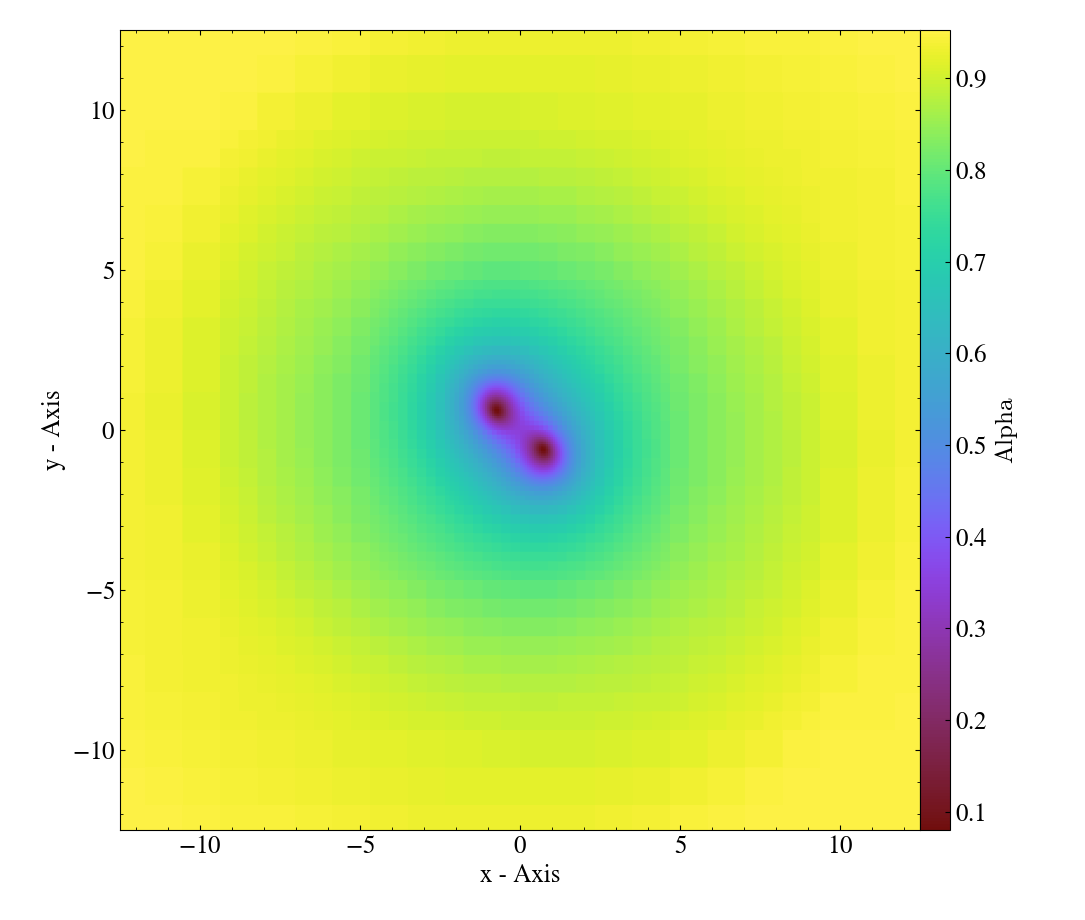

yt : [INFO     ] 2021-03-22 11:32:47,150 xlim = -75.000000 75.000000
yt : [INFO     ] 2021-03-22 11:32:47,150 ylim = -75.000000 75.000000
yt : [INFO     ] 2021-03-22 11:32:47,151 xlim = -75.000000 75.000000
yt : [INFO     ] 2021-03-22 11:32:47,153 ylim = -75.000000 75.000000
yt : [INFO     ] 2021-03-22 11:32:47,155 Making a fixed resolution buffer of (('boxlib', 'chi')) 800 by 800
yt : [INFO     ] 2021-03-22 11:32:47,295 Making a fixed resolution buffer of (('boxlib', 'chi')) 800 by 800



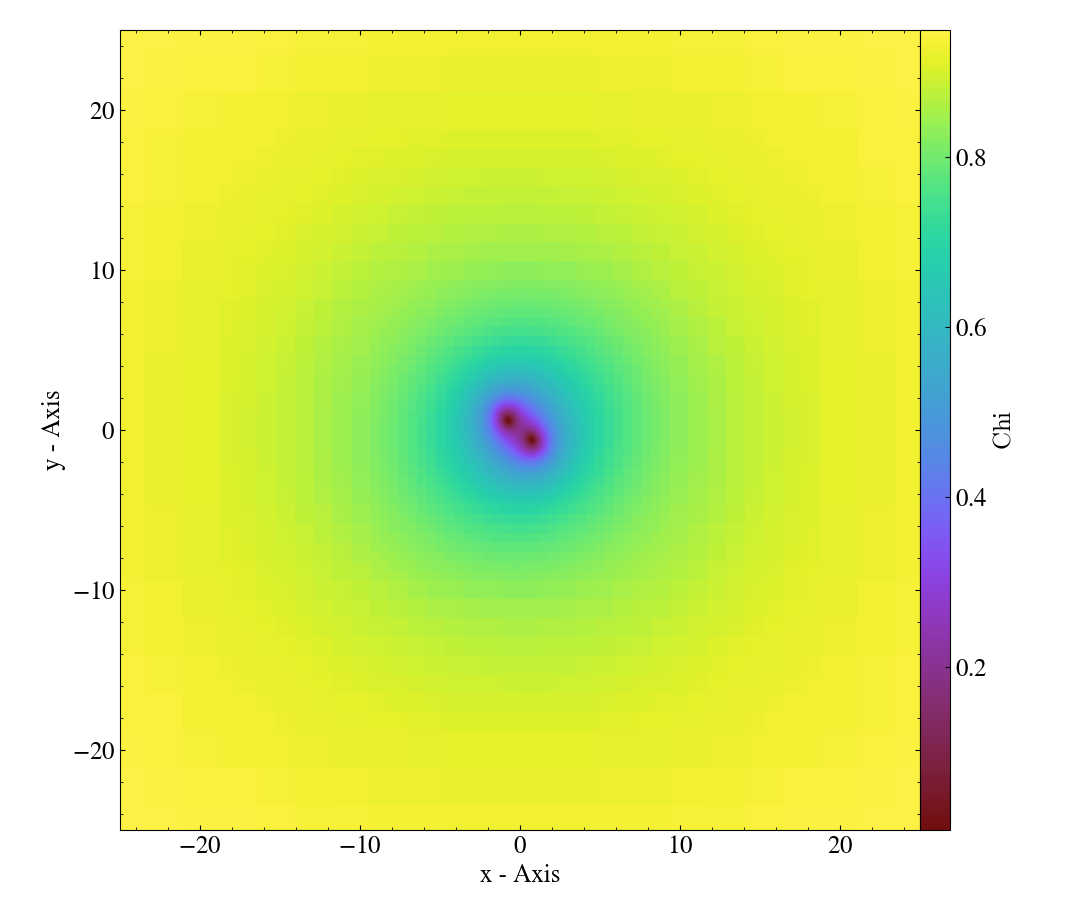

yt : [INFO     ] 2021-03-22 11:32:47,835 xlim = -75.000000 75.000000
yt : [INFO     ] 2021-03-22 11:32:47,836 ylim = -75.000000 75.000000
yt : [INFO     ] 2021-03-22 11:32:47,837 xlim = -75.000000 75.000000
yt : [INFO     ] 2021-03-22 11:32:47,838 ylim = -75.000000 75.000000
yt : [INFO     ] 2021-03-22 11:32:47,841 Making a fixed resolution buffer of (('boxlib', 'Khat')) 800 by 800
yt : [WARNING  ] 2021-03-22 11:32:47,867 Plot image for field ('boxlib', 'Khat') has both positive and negative values. Min = -0.009278, Max = 0.147854.
yt : [WARNING  ] 2021-03-22 11:32:47,867 Switching to symlog colorbar scaling unless linear scaling is specified later
yt : [INFO     ] 2021-03-22 11:32:47,952 Making a fixed resolution buffer of (('boxlib', 'Khat')) 800 by 800
yt : [WARNING  ] 2021-03-22 11:32:47,971 Plot image for field ('boxlib', 'Khat') has both positive and negative values. Min = -0.009278, Max = 0.147854.
yt : [WARNING  ] 2021-03-22 11:32:47,972 Switching to symlog colorbar scaling unl


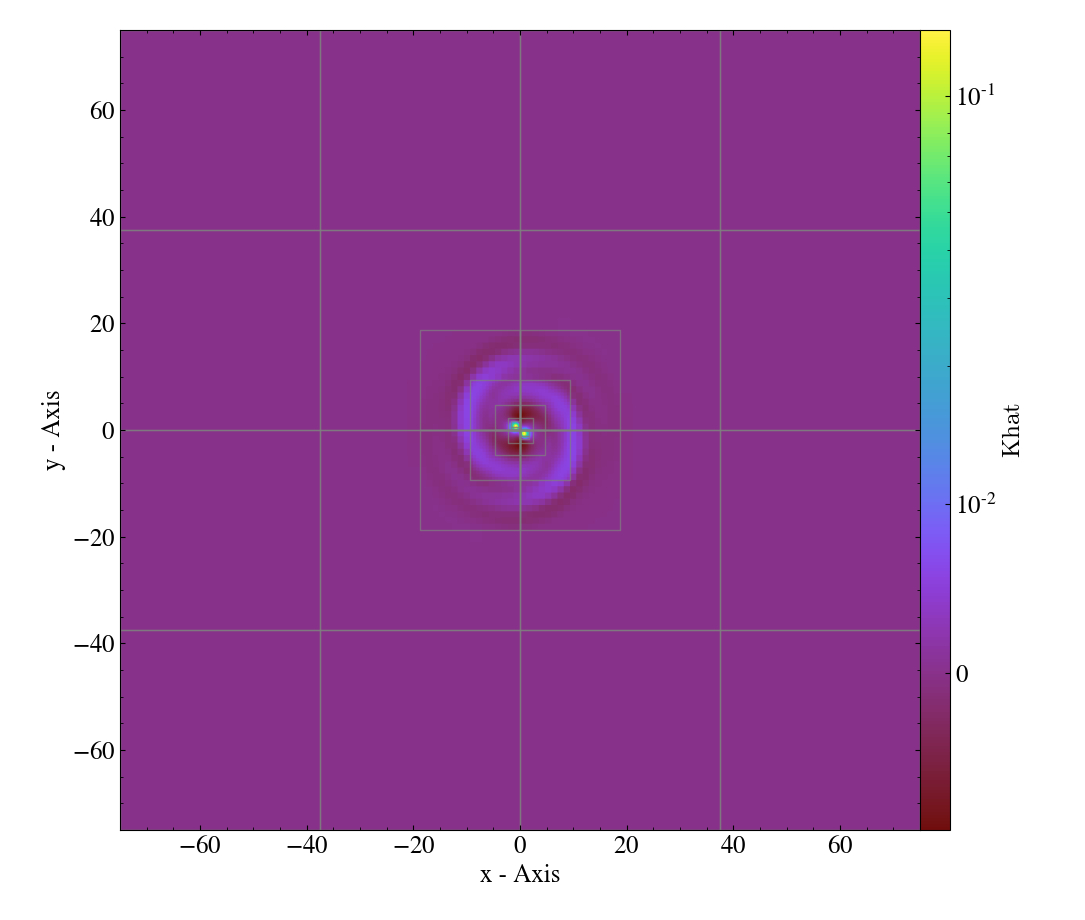

yt : [INFO     ] 2021-03-22 11:32:48,353 xlim = -75.000000 75.000000
yt : [INFO     ] 2021-03-22 11:32:48,353 ylim = -75.000000 75.000000
yt : [INFO     ] 2021-03-22 11:32:48,354 xlim = -75.000000 75.000000
yt : [INFO     ] 2021-03-22 11:32:48,355 ylim = -75.000000 75.000000
yt : [INFO     ] 2021-03-22 11:32:48,356 Making a fixed resolution buffer of (('boxlib', 'rPsi4Real')) 800 by 800
yt : [WARNING  ] 2021-03-22 11:32:48,385 Plot image for field ('boxlib', 'rPsi4Real') has both positive and negative values. Min = -0.000114, Max = 0.858474.
yt : [WARNING  ] 2021-03-22 11:32:48,386 Switching to symlog colorbar scaling unless linear scaling is specified later


TypeError: set_zlim() missing 1 required positional argument: 'zmin'

In [30]:
var = 'alpha'
s = yt.SlicePlot(dplot, 'z', ('boxlib', var), origin='native', center = [0,0,0])
s.set_log(('boxlib', var), False)
s.set_xlabel('x - Axis')
s.set_ylabel('y - Axis')
#s.set_zlim(('boxlib', var), 0.075, 0.6)
#s.hide_colorbar()
#s.hide_axes()
#s.annotate_grids()
#s.set_cmap('alpha', 'RdBu_r')
s.zoom(4*1.5)
s.show()

var = 'chi'
s = yt.SlicePlot(dplot, 'z', ('boxlib', var), origin='native', center = [0,0,0])
s.set_log(('boxlib', var), False)
s.set_xlabel('x - Axis')
s.set_ylabel('y - Axis')
#s.set_zlim(('boxlib', var), 0.075, 0.6)
#s.hide_colorbar()
#s.hide_axes()
#s.annotate_grids(min_level = 0, edgecolors='lightgray')
#s.set_cmap('alpha', 'RdBu_r')
s.zoom(3)
s.show()

var = 'Khat'
s = yt.SlicePlot(dplot, 'z', ('boxlib', var), origin='native', center = [0,0,0])
s.set_log(('boxlib', var), True)
s.set_xlabel('x - Axis')
s.set_ylabel('y - Axis')
#s.set_zlim(('boxlib', var), 0.000001, 10)
#s.hide_colorbar()
#s.hide_axes()
s.annotate_grids(min_level = 0, edgecolors='gray')
#s.set_cmap('alpha', 'RdBu_r')
s.zoom(1)
s.show()

var = 'rPsi4Real'
s = yt.SlicePlot(ddiag, 'z', ('boxlib', var), origin='native', center = [0,0,0])
s.set_log(('boxlib', var), True)
s.set_xlabel('x - Axis')
s.set_ylabel('y - Axis')
s.set_zlim(('boxlib', var), zmax = 10e-1)
#s.hide_colorbar()
#s.hide_axes()
#s.annotate_grids(max_level = 5, min_level = 5, edgecolors='lightgray')
#s.set_cmap('alpha', 'RdBu_r')
s.zoom(1)
s.show()

In [157]:
for i in range(1401,1601):
    ident = list(str(int(i)+10000))
    ident[0] = '0'
    #plotname = "plt00"+"".join(ident)
    diagname = "diag00"+"".join(ident)
    #dplot = yt.load(plotname)
    ddiag = yt.load(diagname)
    
    sc = yt.create_scene(ddiag,('boxlib', 'AbsAlpha'))
    sc.add_source(VolumeSource(ddiag,('boxlib', 'AbsKhat')))
    source = sc[0]
    source2 = sc[1]
    
    source.tfh.set_bounds((0.3,0.8))
    
    source2.tfh.set_log(True)
    source2.tfh.set_bounds((0.0008,0.001))
    
    #sc.annotate_domain(dplot, color=[255, 255, 255, 0.1])
    
    if i%3 == 0:
        sc.annotate_grids(dplot, alpha = 0.01, min_level = 2, max_level = 4)
    else:
        sc.annotate_grids(dplot, alpha = 0.01, min_level = 2, max_level = 4)
        
    
    cam = sc.camera
    cam.resolution = 1024
    normal_vector = [-0.6,1.0,-0.9]
    north_vector = [0.,0.,1.0]
    cam.switch_orientation(normal_vector=normal_vector, north_vector=north_vector)
    cam.zoom(6)
    ident2 = list(str(i+10000))
    ident2[0] = '0'
    dst = "img"+"".join(ident2)+".png"
    print(diagname)
    print(dst)
    sc.save(dst, sigma_clip=6)

yt : [INFO     ] 2021-03-19 14:54:01,378 Parameters: current_time              = 54.726507773438335
yt : [INFO     ] 2021-03-19 14:54:01,379 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 14:54:01,380 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 14:54:01,380 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 14:54:01,525 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 14:54:01,535 Creating volume


diag0001401
img01401.png


yt : [INFO     ] 2021-03-19 14:54:02,150 Creating transfer function
yt : [INFO     ] 2021-03-19 14:54:16,774 Creating volume
yt : [INFO     ] 2021-03-19 14:54:17,402 Creating transfer function
yt : [INFO     ] 2021-03-19 14:54:33,093 Saving render img01401.png
yt : [INFO     ] 2021-03-19 14:54:34,723 Parameters: current_time              = 54.765570234375836
yt : [INFO     ] 2021-03-19 14:54:34,723 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 14:54:34,724 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 14:54:34,725 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 14:54:34,865 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 14:54:34,875 Creating volume


diag0001402
img01402.png


yt : [INFO     ] 2021-03-19 14:54:35,465 Creating transfer function
yt : [INFO     ] 2021-03-19 14:54:50,092 Creating volume
yt : [INFO     ] 2021-03-19 14:54:50,716 Creating transfer function
yt : [INFO     ] 2021-03-19 14:55:06,384 Saving render img01402.png
yt : [INFO     ] 2021-03-19 14:55:07,431 Parameters: current_time              = 54.80463269531334
yt : [INFO     ] 2021-03-19 14:55:07,432 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 14:55:07,432 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 14:55:07,433 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 14:55:07,572 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 14:55:07,582 Creating volume


diag0001403
img01403.png


yt : [INFO     ] 2021-03-19 14:55:08,170 Creating transfer function
yt : [INFO     ] 2021-03-19 14:55:22,804 Creating volume
yt : [INFO     ] 2021-03-19 14:55:23,430 Creating transfer function
yt : [INFO     ] 2021-03-19 14:55:38,834 Saving render img01403.png
yt : [INFO     ] 2021-03-19 14:55:39,879 Parameters: current_time              = 54.84369515625084
yt : [INFO     ] 2021-03-19 14:55:39,880 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 14:55:39,880 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 14:55:39,881 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 14:55:40,022 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 14:55:40,031 Creating volume


diag0001404
img01404.png


yt : [INFO     ] 2021-03-19 14:55:40,582 Creating transfer function
yt : [INFO     ] 2021-03-19 14:55:55,193 Creating volume
yt : [INFO     ] 2021-03-19 14:55:55,809 Creating transfer function
yt : [INFO     ] 2021-03-19 14:56:11,199 Saving render img01404.png
yt : [INFO     ] 2021-03-19 14:56:12,246 Parameters: current_time              = 54.88275761718834
yt : [INFO     ] 2021-03-19 14:56:12,246 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 14:56:12,247 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 14:56:12,247 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 14:56:12,384 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 14:56:12,394 Creating volume


diag0001405
img01405.png


yt : [INFO     ] 2021-03-19 14:56:12,957 Creating transfer function
yt : [INFO     ] 2021-03-19 14:56:27,592 Creating volume
yt : [INFO     ] 2021-03-19 14:56:28,208 Creating transfer function
yt : [INFO     ] 2021-03-19 14:56:43,652 Saving render img01405.png
yt : [INFO     ] 2021-03-19 14:56:44,697 Parameters: current_time              = 54.92182007812584
yt : [INFO     ] 2021-03-19 14:56:44,698 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 14:56:44,698 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 14:56:44,699 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 14:56:44,836 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 14:56:44,846 Creating volume


diag0001406
img01406.png


yt : [INFO     ] 2021-03-19 14:56:45,647 Creating transfer function
yt : [INFO     ] 2021-03-19 14:57:00,296 Creating volume
yt : [INFO     ] 2021-03-19 14:57:00,932 Creating transfer function
yt : [INFO     ] 2021-03-19 14:57:16,403 Saving render img01406.png
yt : [INFO     ] 2021-03-19 14:57:17,446 Parameters: current_time              = 54.96088253906334
yt : [INFO     ] 2021-03-19 14:57:17,447 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 14:57:17,447 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 14:57:17,448 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 14:57:17,592 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 14:57:17,601 Creating volume


diag0001407
img01407.png


yt : [INFO     ] 2021-03-19 14:57:18,192 Creating transfer function
yt : [INFO     ] 2021-03-19 14:57:32,838 Creating volume
yt : [INFO     ] 2021-03-19 14:57:33,471 Creating transfer function
yt : [INFO     ] 2021-03-19 14:57:48,937 Saving render img01407.png
yt : [INFO     ] 2021-03-19 14:57:49,982 Parameters: current_time              = 54.99994500000084
yt : [INFO     ] 2021-03-19 14:57:49,982 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 14:57:49,983 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 14:57:49,983 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 14:57:50,123 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 14:57:50,133 Creating volume


diag0001408
img01408.png


yt : [INFO     ] 2021-03-19 14:57:50,715 Creating transfer function
yt : [INFO     ] 2021-03-19 14:58:05,418 Creating volume
yt : [INFO     ] 2021-03-19 14:58:06,048 Creating transfer function
yt : [INFO     ] 2021-03-19 14:58:21,504 Saving render img01408.png
yt : [INFO     ] 2021-03-19 14:58:22,546 Parameters: current_time              = 55.03900746093834
yt : [INFO     ] 2021-03-19 14:58:22,546 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 14:58:22,547 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 14:58:22,547 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 14:58:22,686 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 14:58:22,695 Creating volume


diag0001409
img01409.png


yt : [INFO     ] 2021-03-19 14:58:23,242 Creating transfer function
yt : [INFO     ] 2021-03-19 14:58:37,877 Creating volume
yt : [INFO     ] 2021-03-19 14:58:38,485 Creating transfer function
yt : [INFO     ] 2021-03-19 14:58:53,865 Saving render img01409.png
yt : [INFO     ] 2021-03-19 14:58:54,907 Parameters: current_time              = 55.078069921875844
yt : [INFO     ] 2021-03-19 14:58:54,908 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 14:58:54,908 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 14:58:54,909 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 14:58:55,050 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 14:58:55,060 Creating volume


diag0001410
img01410.png


yt : [INFO     ] 2021-03-19 14:58:55,635 Creating transfer function
yt : [INFO     ] 2021-03-19 14:59:10,250 Creating volume
yt : [INFO     ] 2021-03-19 14:59:10,872 Creating transfer function
yt : [INFO     ] 2021-03-19 14:59:26,272 Saving render img01410.png
yt : [INFO     ] 2021-03-19 14:59:27,316 Parameters: current_time              = 55.117132382813345
yt : [INFO     ] 2021-03-19 14:59:27,316 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 14:59:27,317 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 14:59:27,317 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 14:59:27,456 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 14:59:27,466 Creating volume


diag0001411
img01411.png


yt : [INFO     ] 2021-03-19 14:59:28,038 Creating transfer function
yt : [INFO     ] 2021-03-19 14:59:43,051 Creating volume
yt : [INFO     ] 2021-03-19 14:59:43,670 Creating transfer function
yt : [INFO     ] 2021-03-19 14:59:59,081 Saving render img01411.png
yt : [INFO     ] 2021-03-19 15:00:00,124 Parameters: current_time              = 55.156194843750846
yt : [INFO     ] 2021-03-19 15:00:00,124 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:00:00,125 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:00:00,125 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:00:00,263 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:00:00,273 Creating volume


diag0001412
img01412.png


yt : [INFO     ] 2021-03-19 15:00:01,055 Creating transfer function
yt : [INFO     ] 2021-03-19 15:00:15,799 Creating volume
yt : [INFO     ] 2021-03-19 15:00:16,434 Creating transfer function
yt : [INFO     ] 2021-03-19 15:00:31,981 Saving render img01412.png
yt : [INFO     ] 2021-03-19 15:00:33,023 Parameters: current_time              = 55.19525730468835
yt : [INFO     ] 2021-03-19 15:00:33,024 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:00:33,024 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:00:33,025 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:00:33,166 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:00:33,176 Creating volume


diag0001413
img01413.png


yt : [INFO     ] 2021-03-19 15:00:33,756 Creating transfer function
yt : [INFO     ] 2021-03-19 15:00:48,368 Creating volume
yt : [INFO     ] 2021-03-19 15:00:48,994 Creating transfer function
yt : [INFO     ] 2021-03-19 15:01:04,510 Saving render img01413.png
yt : [INFO     ] 2021-03-19 15:01:05,554 Parameters: current_time              = 55.23431976562585
yt : [INFO     ] 2021-03-19 15:01:05,554 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:01:05,555 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:01:05,555 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:01:05,694 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:01:05,704 Creating volume


diag0001414
img01414.png


yt : [INFO     ] 2021-03-19 15:01:06,289 Creating transfer function
yt : [INFO     ] 2021-03-19 15:01:20,900 Creating volume
yt : [INFO     ] 2021-03-19 15:01:21,519 Creating transfer function
yt : [INFO     ] 2021-03-19 15:01:37,013 Saving render img01414.png
yt : [INFO     ] 2021-03-19 15:01:38,054 Parameters: current_time              = 55.27338222656335
yt : [INFO     ] 2021-03-19 15:01:38,054 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:01:38,055 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:01:38,055 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:01:38,196 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:01:38,206 Creating volume


diag0001415
img01415.png


yt : [INFO     ] 2021-03-19 15:01:38,782 Creating transfer function
yt : [INFO     ] 2021-03-19 15:01:53,441 Creating volume
yt : [INFO     ] 2021-03-19 15:01:54,066 Creating transfer function
yt : [INFO     ] 2021-03-19 15:02:09,434 Saving render img01415.png
yt : [INFO     ] 2021-03-19 15:02:10,475 Parameters: current_time              = 55.31244468750085
yt : [INFO     ] 2021-03-19 15:02:10,475 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:02:10,476 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:02:10,476 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:02:10,617 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:02:10,627 Creating volume


diag0001416
img01416.png


yt : [INFO     ] 2021-03-19 15:02:11,210 Creating transfer function
yt : [INFO     ] 2021-03-19 15:02:25,808 Creating volume
yt : [INFO     ] 2021-03-19 15:02:26,481 Creating transfer function
yt : [INFO     ] 2021-03-19 15:02:41,879 Saving render img01416.png
yt : [INFO     ] 2021-03-19 15:02:42,917 Parameters: current_time              = 55.35150714843835
yt : [INFO     ] 2021-03-19 15:02:42,918 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:02:42,918 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:02:42,918 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:02:43,057 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:02:43,067 Creating volume


diag0001417
img01417.png


yt : [INFO     ] 2021-03-19 15:02:43,675 Creating transfer function
yt : [INFO     ] 2021-03-19 15:02:58,321 Creating volume
yt : [INFO     ] 2021-03-19 15:02:58,944 Creating transfer function
yt : [INFO     ] 2021-03-19 15:03:14,354 Saving render img01417.png
yt : [INFO     ] 2021-03-19 15:03:15,392 Parameters: current_time              = 55.39056960937585
yt : [INFO     ] 2021-03-19 15:03:15,393 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:03:15,393 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:03:15,394 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:03:15,531 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:03:15,541 Creating volume


diag0001418
img01418.png


yt : [INFO     ] 2021-03-19 15:03:16,124 Creating transfer function
yt : [INFO     ] 2021-03-19 15:03:30,730 Creating volume
yt : [INFO     ] 2021-03-19 15:03:31,356 Creating transfer function
yt : [INFO     ] 2021-03-19 15:03:46,708 Saving render img01418.png
yt : [INFO     ] 2021-03-19 15:03:47,775 Parameters: current_time              = 55.42963207031335
yt : [INFO     ] 2021-03-19 15:03:47,776 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:03:47,776 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:03:47,777 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:03:48,139 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:03:48,149 Creating volume


diag0001419
img01419.png


yt : [INFO     ] 2021-03-19 15:03:48,734 Creating transfer function
yt : [INFO     ] 2021-03-19 15:04:03,410 Creating volume
yt : [INFO     ] 2021-03-19 15:04:04,026 Creating transfer function
yt : [INFO     ] 2021-03-19 15:04:19,455 Saving render img01419.png
yt : [INFO     ] 2021-03-19 15:04:20,500 Parameters: current_time              = 55.468694531250854
yt : [INFO     ] 2021-03-19 15:04:20,500 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:04:20,501 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:04:20,501 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:04:20,643 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:04:20,653 Creating volume


diag0001420
img01420.png


yt : [INFO     ] 2021-03-19 15:04:21,230 Creating transfer function
yt : [INFO     ] 2021-03-19 15:04:35,916 Creating volume
yt : [INFO     ] 2021-03-19 15:04:36,526 Creating transfer function
yt : [INFO     ] 2021-03-19 15:04:51,954 Saving render img01420.png
yt : [INFO     ] 2021-03-19 15:04:52,997 Parameters: current_time              = 55.507756992188355
yt : [INFO     ] 2021-03-19 15:04:52,997 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:04:52,998 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:04:52,998 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:04:53,138 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:04:53,148 Creating volume


diag0001421
img01421.png


yt : [INFO     ] 2021-03-19 15:04:53,736 Creating transfer function
yt : [INFO     ] 2021-03-19 15:05:08,409 Creating volume
yt : [INFO     ] 2021-03-19 15:05:09,016 Creating transfer function
yt : [INFO     ] 2021-03-19 15:05:24,447 Saving render img01421.png
yt : [INFO     ] 2021-03-19 15:05:25,491 Parameters: current_time              = 55.546819453125856
yt : [INFO     ] 2021-03-19 15:05:25,492 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:05:25,492 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:05:25,493 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:05:25,635 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:05:25,645 Creating volume


diag0001422
img01422.png


yt : [INFO     ] 2021-03-19 15:05:26,212 Creating transfer function
yt : [INFO     ] 2021-03-19 15:05:40,889 Creating volume
yt : [INFO     ] 2021-03-19 15:05:41,503 Creating transfer function
yt : [INFO     ] 2021-03-19 15:05:56,884 Saving render img01422.png
yt : [INFO     ] 2021-03-19 15:05:57,927 Parameters: current_time              = 55.58588191406336
yt : [INFO     ] 2021-03-19 15:05:57,927 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:05:57,928 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:05:57,928 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:05:58,070 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:05:58,079 Creating volume


diag0001423
img01423.png


yt : [INFO     ] 2021-03-19 15:05:58,667 Creating transfer function
yt : [INFO     ] 2021-03-19 15:06:13,372 Creating volume
yt : [INFO     ] 2021-03-19 15:06:13,990 Creating transfer function
yt : [INFO     ] 2021-03-19 15:06:29,393 Saving render img01423.png
yt : [INFO     ] 2021-03-19 15:06:30,436 Parameters: current_time              = 55.62494437500086
yt : [INFO     ] 2021-03-19 15:06:30,436 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:06:30,437 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:06:30,437 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:06:30,575 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:06:30,585 Creating volume


diag0001424
img01424.png


yt : [INFO     ] 2021-03-19 15:06:31,166 Creating transfer function
yt : [INFO     ] 2021-03-19 15:06:45,768 Creating volume
yt : [INFO     ] 2021-03-19 15:06:46,388 Creating transfer function
yt : [INFO     ] 2021-03-19 15:07:02,399 Saving render img01424.png
yt : [INFO     ] 2021-03-19 15:07:03,437 Parameters: current_time              = 55.66400683593836
yt : [INFO     ] 2021-03-19 15:07:03,438 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:07:03,438 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:07:03,439 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:07:03,798 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:07:03,808 Creating volume


diag0001425
img01425.png


yt : [INFO     ] 2021-03-19 15:07:04,426 Creating transfer function
yt : [INFO     ] 2021-03-19 15:07:19,078 Creating volume
yt : [INFO     ] 2021-03-19 15:07:19,709 Creating transfer function
yt : [INFO     ] 2021-03-19 15:07:35,203 Saving render img01425.png
yt : [INFO     ] 2021-03-19 15:07:36,243 Parameters: current_time              = 55.70306929687586
yt : [INFO     ] 2021-03-19 15:07:36,243 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:07:36,243 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:07:36,244 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:07:36,386 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:07:36,396 Creating volume


diag0001426
img01426.png


yt : [INFO     ] 2021-03-19 15:07:36,973 Creating transfer function
yt : [INFO     ] 2021-03-19 15:07:51,629 Creating volume
yt : [INFO     ] 2021-03-19 15:07:52,261 Creating transfer function
yt : [INFO     ] 2021-03-19 15:08:07,966 Saving render img01426.png
yt : [INFO     ] 2021-03-19 15:08:09,007 Parameters: current_time              = 55.74213175781336
yt : [INFO     ] 2021-03-19 15:08:09,007 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:08:09,008 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:08:09,008 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:08:09,149 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:08:09,159 Creating volume


diag0001427
img01427.png


yt : [INFO     ] 2021-03-19 15:08:09,774 Creating transfer function
yt : [INFO     ] 2021-03-19 15:08:24,415 Creating volume
yt : [INFO     ] 2021-03-19 15:08:25,045 Creating transfer function
yt : [INFO     ] 2021-03-19 15:08:40,480 Saving render img01427.png
yt : [INFO     ] 2021-03-19 15:08:41,518 Parameters: current_time              = 55.78119421875086
yt : [INFO     ] 2021-03-19 15:08:41,518 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:08:41,519 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:08:41,519 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:08:41,659 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:08:41,669 Creating volume


diag0001428
img01428.png


yt : [INFO     ] 2021-03-19 15:08:42,255 Creating transfer function
yt : [INFO     ] 2021-03-19 15:08:56,836 Creating volume
yt : [INFO     ] 2021-03-19 15:08:57,463 Creating transfer function
yt : [INFO     ] 2021-03-19 15:09:12,972 Saving render img01428.png
yt : [INFO     ] 2021-03-19 15:09:14,010 Parameters: current_time              = 55.82025667968836
yt : [INFO     ] 2021-03-19 15:09:14,011 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:09:14,011 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:09:14,012 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:09:14,154 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:09:14,164 Creating volume


diag0001429
img01429.png


yt : [INFO     ] 2021-03-19 15:09:14,726 Creating transfer function
yt : [INFO     ] 2021-03-19 15:09:29,472 Creating volume
yt : [INFO     ] 2021-03-19 15:09:30,093 Creating transfer function
yt : [INFO     ] 2021-03-19 15:09:45,505 Saving render img01429.png
yt : [INFO     ] 2021-03-19 15:09:46,544 Parameters: current_time              = 55.859319140625864
yt : [INFO     ] 2021-03-19 15:09:46,544 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:09:46,544 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:09:46,545 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:09:46,688 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:09:46,697 Creating volume


diag0001430
img01430.png


yt : [INFO     ] 2021-03-19 15:09:47,319 Creating transfer function
yt : [INFO     ] 2021-03-19 15:10:01,948 Creating volume
yt : [INFO     ] 2021-03-19 15:10:02,567 Creating transfer function
yt : [INFO     ] 2021-03-19 15:10:17,949 Saving render img01430.png
yt : [INFO     ] 2021-03-19 15:10:18,993 Parameters: current_time              = 55.898381601563365
yt : [INFO     ] 2021-03-19 15:10:18,993 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:10:18,994 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:10:18,994 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:10:19,131 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:10:19,141 Creating volume


diag0001431
img01431.png


yt : [INFO     ] 2021-03-19 15:10:19,752 Creating transfer function
yt : [INFO     ] 2021-03-19 15:10:34,440 Creating volume
yt : [INFO     ] 2021-03-19 15:10:35,257 Creating transfer function
yt : [INFO     ] 2021-03-19 15:10:50,841 Saving render img01431.png
yt : [INFO     ] 2021-03-19 15:10:52,006 Parameters: current_time              = 55.937444062500866
yt : [INFO     ] 2021-03-19 15:10:52,007 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:10:52,007 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:10:52,008 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:10:52,150 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:10:52,160 Creating volume


diag0001432
img01432.png


yt : [INFO     ] 2021-03-19 15:10:52,714 Creating transfer function
yt : [INFO     ] 2021-03-19 15:11:07,341 Creating volume
yt : [INFO     ] 2021-03-19 15:11:07,968 Creating transfer function
yt : [INFO     ] 2021-03-19 15:11:23,562 Saving render img01432.png
yt : [INFO     ] 2021-03-19 15:11:24,594 Parameters: current_time              = 55.97650652343837
yt : [INFO     ] 2021-03-19 15:11:24,595 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:11:24,595 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:11:24,596 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:11:24,736 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:11:24,746 Creating volume


diag0001433
img01433.png


yt : [INFO     ] 2021-03-19 15:11:25,317 Creating transfer function
yt : [INFO     ] 2021-03-19 15:11:39,979 Creating volume
yt : [INFO     ] 2021-03-19 15:11:40,603 Creating transfer function
yt : [INFO     ] 2021-03-19 15:11:56,073 Saving render img01433.png
yt : [INFO     ] 2021-03-19 15:11:57,109 Parameters: current_time              = 56.01556898437587
yt : [INFO     ] 2021-03-19 15:11:57,110 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:11:57,110 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:11:57,111 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:11:57,252 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:11:57,262 Creating volume


diag0001434
img01434.png


yt : [INFO     ] 2021-03-19 15:11:57,813 Creating transfer function
yt : [INFO     ] 2021-03-19 15:12:13,407 Creating volume
yt : [INFO     ] 2021-03-19 15:12:14,029 Creating transfer function
yt : [INFO     ] 2021-03-19 15:12:29,432 Saving render img01434.png
yt : [INFO     ] 2021-03-19 15:12:30,461 Parameters: current_time              = 56.05463144531337
yt : [INFO     ] 2021-03-19 15:12:30,461 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:12:30,462 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:12:30,462 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:12:30,604 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:12:30,614 Creating volume


diag0001435
img01435.png


yt : [INFO     ] 2021-03-19 15:12:31,195 Creating transfer function
yt : [INFO     ] 2021-03-19 15:12:45,843 Creating volume
yt : [INFO     ] 2021-03-19 15:12:46,468 Creating transfer function
yt : [INFO     ] 2021-03-19 15:13:01,851 Saving render img01435.png
yt : [INFO     ] 2021-03-19 15:13:02,877 Parameters: current_time              = 56.09369390625087
yt : [INFO     ] 2021-03-19 15:13:02,878 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:13:02,878 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:13:02,879 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:13:03,021 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:13:03,031 Creating volume


diag0001436
img01436.png


yt : [INFO     ] 2021-03-19 15:13:03,608 Creating transfer function
yt : [INFO     ] 2021-03-19 15:13:18,266 Creating volume
yt : [INFO     ] 2021-03-19 15:13:18,887 Creating transfer function
yt : [INFO     ] 2021-03-19 15:13:34,245 Saving render img01436.png
yt : [INFO     ] 2021-03-19 15:13:35,276 Parameters: current_time              = 56.13275636718837
yt : [INFO     ] 2021-03-19 15:13:35,276 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:13:35,277 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:13:35,277 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:13:35,416 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:13:35,426 Creating volume


diag0001437
img01437.png


yt : [INFO     ] 2021-03-19 15:13:36,002 Creating transfer function
yt : [INFO     ] 2021-03-19 15:13:50,587 Creating volume
yt : [INFO     ] 2021-03-19 15:13:51,209 Creating transfer function
yt : [INFO     ] 2021-03-19 15:14:06,754 Saving render img01437.png
yt : [INFO     ] 2021-03-19 15:14:07,812 Parameters: current_time              = 56.17181882812587
yt : [INFO     ] 2021-03-19 15:14:07,813 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:14:07,813 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:14:07,814 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:14:08,181 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:14:08,191 Creating volume


diag0001438
img01438.png


yt : [INFO     ] 2021-03-19 15:14:08,811 Creating transfer function
yt : [INFO     ] 2021-03-19 15:14:23,434 Creating volume
yt : [INFO     ] 2021-03-19 15:14:24,065 Creating transfer function
yt : [INFO     ] 2021-03-19 15:14:39,514 Saving render img01438.png
yt : [INFO     ] 2021-03-19 15:14:40,565 Parameters: current_time              = 56.21088128906337
yt : [INFO     ] 2021-03-19 15:14:40,565 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:14:40,565 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:14:40,566 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:14:40,707 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:14:40,717 Creating volume


diag0001439
img01439.png


yt : [INFO     ] 2021-03-19 15:14:41,301 Creating transfer function
yt : [INFO     ] 2021-03-19 15:14:55,890 Creating volume
yt : [INFO     ] 2021-03-19 15:14:56,504 Creating transfer function
yt : [INFO     ] 2021-03-19 15:15:11,863 Saving render img01439.png
yt : [INFO     ] 2021-03-19 15:15:12,956 Parameters: current_time              = 56.249943750000874
yt : [INFO     ] 2021-03-19 15:15:12,956 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:15:12,957 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:15:12,957 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:15:13,099 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:15:13,109 Creating volume


diag0001440
img01440.png


yt : [INFO     ] 2021-03-19 15:15:13,702 Creating transfer function
yt : [INFO     ] 2021-03-19 15:15:28,303 Creating volume
yt : [INFO     ] 2021-03-19 15:15:28,928 Creating transfer function
yt : [INFO     ] 2021-03-19 15:15:44,406 Saving render img01440.png
yt : [INFO     ] 2021-03-19 15:15:45,506 Parameters: current_time              = 56.289006210938375
yt : [INFO     ] 2021-03-19 15:15:45,506 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:15:45,507 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:15:45,508 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:15:45,647 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:15:45,656 Creating volume


diag0001441
img01441.png


yt : [INFO     ] 2021-03-19 15:15:46,225 Creating transfer function
yt : [INFO     ] 2021-03-19 15:16:01,183 Creating volume
yt : [INFO     ] 2021-03-19 15:16:01,810 Creating transfer function
yt : [INFO     ] 2021-03-19 15:16:17,144 Saving render img01441.png
yt : [INFO     ] 2021-03-19 15:16:18,251 Parameters: current_time              = 56.328068671875876
yt : [INFO     ] 2021-03-19 15:16:18,251 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:16:18,252 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:16:18,252 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:16:18,395 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:16:18,405 Creating volume


diag0001442
img01442.png


yt : [INFO     ] 2021-03-19 15:16:19,006 Creating transfer function
yt : [INFO     ] 2021-03-19 15:16:33,702 Creating volume
yt : [INFO     ] 2021-03-19 15:16:34,327 Creating transfer function
yt : [INFO     ] 2021-03-19 15:16:49,675 Saving render img01442.png
yt : [INFO     ] 2021-03-19 15:16:50,789 Parameters: current_time              = 56.36713113281338
yt : [INFO     ] 2021-03-19 15:16:50,789 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:16:50,790 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:16:50,790 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:16:50,928 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:16:50,938 Creating volume


diag0001443
img01443.png


yt : [INFO     ] 2021-03-19 15:16:51,557 Creating transfer function
yt : [INFO     ] 2021-03-19 15:17:06,205 Creating volume
yt : [INFO     ] 2021-03-19 15:17:06,829 Creating transfer function
yt : [INFO     ] 2021-03-19 15:17:22,177 Saving render img01443.png
yt : [INFO     ] 2021-03-19 15:17:23,307 Parameters: current_time              = 56.40619359375088
yt : [INFO     ] 2021-03-19 15:17:23,307 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:17:23,308 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:17:23,308 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:17:23,446 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:17:23,456 Creating volume


diag0001444
img01444.png


yt : [INFO     ] 2021-03-19 15:17:24,087 Creating transfer function
yt : [INFO     ] 2021-03-19 15:17:38,737 Creating volume
yt : [INFO     ] 2021-03-19 15:17:39,363 Creating transfer function
yt : [INFO     ] 2021-03-19 15:17:54,814 Saving render img01444.png
yt : [INFO     ] 2021-03-19 15:17:56,044 Parameters: current_time              = 56.44525605468838
yt : [INFO     ] 2021-03-19 15:17:56,044 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:17:56,045 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:17:56,045 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:17:56,417 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:17:56,427 Creating volume


diag0001445
img01445.png


yt : [INFO     ] 2021-03-19 15:17:57,026 Creating transfer function
yt : [INFO     ] 2021-03-19 15:18:11,974 Creating volume
yt : [INFO     ] 2021-03-19 15:18:12,610 Creating transfer function
yt : [INFO     ] 2021-03-19 15:18:28,088 Saving render img01445.png
yt : [INFO     ] 2021-03-19 15:18:29,321 Parameters: current_time              = 56.48431851562588
yt : [INFO     ] 2021-03-19 15:18:29,321 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:18:29,321 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:18:29,322 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:18:29,463 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:18:29,472 Creating volume


diag0001446
img01446.png


yt : [INFO     ] 2021-03-19 15:18:30,058 Creating transfer function
yt : [INFO     ] 2021-03-19 15:18:44,678 Creating volume
yt : [INFO     ] 2021-03-19 15:18:45,308 Creating transfer function
yt : [INFO     ] 2021-03-19 15:19:00,690 Saving render img01446.png
yt : [INFO     ] 2021-03-19 15:19:01,919 Parameters: current_time              = 56.52338097656338
yt : [INFO     ] 2021-03-19 15:19:01,919 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:19:01,920 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:19:01,920 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:19:02,064 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:19:02,074 Creating volume


diag0001447
img01447.png


yt : [INFO     ] 2021-03-19 15:19:02,651 Creating transfer function
yt : [INFO     ] 2021-03-19 15:19:17,263 Creating volume
yt : [INFO     ] 2021-03-19 15:19:17,894 Creating transfer function
yt : [INFO     ] 2021-03-19 15:19:33,470 Saving render img01447.png
yt : [INFO     ] 2021-03-19 15:19:34,699 Parameters: current_time              = 56.56244343750088
yt : [INFO     ] 2021-03-19 15:19:34,699 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:19:34,700 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:19:34,700 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:19:34,840 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:19:34,850 Creating volume


diag0001448
img01448.png


yt : [INFO     ] 2021-03-19 15:19:35,458 Creating transfer function
yt : [INFO     ] 2021-03-19 15:19:50,260 Creating volume
yt : [INFO     ] 2021-03-19 15:19:50,891 Creating transfer function
yt : [INFO     ] 2021-03-19 15:20:06,284 Saving render img01448.png
yt : [INFO     ] 2021-03-19 15:20:07,518 Parameters: current_time              = 56.60150589843838
yt : [INFO     ] 2021-03-19 15:20:07,519 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:20:07,519 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:20:07,520 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:20:07,662 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:20:07,672 Creating volume


diag0001449
img01449.png


yt : [INFO     ] 2021-03-19 15:20:08,278 Creating transfer function
yt : [INFO     ] 2021-03-19 15:20:22,875 Creating volume
yt : [INFO     ] 2021-03-19 15:20:23,501 Creating transfer function
yt : [INFO     ] 2021-03-19 15:20:39,089 Saving render img01449.png
yt : [INFO     ] 2021-03-19 15:20:40,319 Parameters: current_time              = 56.640568359375884
yt : [INFO     ] 2021-03-19 15:20:40,320 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:20:40,320 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:20:40,321 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:20:40,460 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:20:40,470 Creating volume


diag0001450
img01450.png


yt : [INFO     ] 2021-03-19 15:20:41,087 Creating transfer function
yt : [INFO     ] 2021-03-19 15:20:55,758 Creating volume
yt : [INFO     ] 2021-03-19 15:20:56,379 Creating transfer function
yt : [INFO     ] 2021-03-19 15:21:11,788 Saving render img01450.png
yt : [INFO     ] 2021-03-19 15:21:13,016 Parameters: current_time              = 56.679630820313385
yt : [INFO     ] 2021-03-19 15:21:13,016 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:21:13,017 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:21:13,018 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:21:13,386 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:21:13,396 Creating volume


diag0001451
img01451.png


yt : [INFO     ] 2021-03-19 15:21:14,027 Creating transfer function
yt : [INFO     ] 2021-03-19 15:21:28,758 Creating volume
yt : [INFO     ] 2021-03-19 15:21:29,392 Creating transfer function
yt : [INFO     ] 2021-03-19 15:21:44,734 Saving render img01451.png
yt : [INFO     ] 2021-03-19 15:21:45,957 Parameters: current_time              = 56.718693281250886
yt : [INFO     ] 2021-03-19 15:21:45,957 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:21:45,958 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:21:45,958 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:21:46,101 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:21:46,110 Creating volume


diag0001452
img01452.png


yt : [INFO     ] 2021-03-19 15:21:46,685 Creating transfer function
yt : [INFO     ] 2021-03-19 15:22:01,301 Creating volume
yt : [INFO     ] 2021-03-19 15:22:01,930 Creating transfer function
yt : [INFO     ] 2021-03-19 15:22:17,265 Saving render img01452.png
yt : [INFO     ] 2021-03-19 15:22:18,493 Parameters: current_time              = 56.75775574218839
yt : [INFO     ] 2021-03-19 15:22:18,494 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:22:18,494 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:22:18,495 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:22:18,636 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:22:18,645 Creating volume


diag0001453
img01453.png


yt : [INFO     ] 2021-03-19 15:22:19,223 Creating transfer function
yt : [INFO     ] 2021-03-19 15:22:33,944 Creating volume
yt : [INFO     ] 2021-03-19 15:22:34,570 Creating transfer function
yt : [INFO     ] 2021-03-19 15:22:49,941 Saving render img01453.png
yt : [INFO     ] 2021-03-19 15:22:51,171 Parameters: current_time              = 56.79681820312589
yt : [INFO     ] 2021-03-19 15:22:51,171 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:22:51,171 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:22:51,172 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:22:51,311 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:22:51,321 Creating volume


diag0001454
img01454.png


yt : [INFO     ] 2021-03-19 15:22:51,911 Creating transfer function
yt : [INFO     ] 2021-03-19 15:23:06,503 Creating volume
yt : [INFO     ] 2021-03-19 15:23:07,130 Creating transfer function
yt : [INFO     ] 2021-03-19 15:23:22,585 Saving render img01454.png
yt : [INFO     ] 2021-03-19 15:23:23,814 Parameters: current_time              = 56.83588066406339
yt : [INFO     ] 2021-03-19 15:23:23,814 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:23:23,815 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:23:23,815 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:23:23,957 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:23:23,967 Creating volume


diag0001455
img01455.png


yt : [INFO     ] 2021-03-19 15:23:24,575 Creating transfer function
yt : [INFO     ] 2021-03-19 15:23:39,217 Creating volume
yt : [INFO     ] 2021-03-19 15:23:39,845 Creating transfer function
yt : [INFO     ] 2021-03-19 15:23:55,231 Saving render img01455.png
yt : [INFO     ] 2021-03-19 15:23:56,462 Parameters: current_time              = 56.87494312500089
yt : [INFO     ] 2021-03-19 15:23:56,462 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:23:56,463 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:23:56,463 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:23:56,602 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:23:56,612 Creating volume


diag0001456
img01456.png


yt : [INFO     ] 2021-03-19 15:23:57,230 Creating transfer function
yt : [INFO     ] 2021-03-19 15:24:11,848 Creating volume
yt : [INFO     ] 2021-03-19 15:24:12,471 Creating transfer function
yt : [INFO     ] 2021-03-19 15:24:28,008 Saving render img01456.png
yt : [INFO     ] 2021-03-19 15:24:29,238 Parameters: current_time              = 56.91400558593839
yt : [INFO     ] 2021-03-19 15:24:29,238 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:24:29,239 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:24:29,239 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:24:29,377 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:24:29,387 Creating volume


diag0001457
img01457.png


yt : [INFO     ] 2021-03-19 15:24:30,191 Creating transfer function
yt : [INFO     ] 2021-03-19 15:24:45,028 Creating volume
yt : [INFO     ] 2021-03-19 15:24:45,663 Creating transfer function
yt : [INFO     ] 2021-03-19 15:25:01,015 Saving render img01457.png
yt : [INFO     ] 2021-03-19 15:25:02,239 Parameters: current_time              = 56.95306804687589
yt : [INFO     ] 2021-03-19 15:25:02,240 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:25:02,240 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:25:02,241 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:25:02,382 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:25:02,392 Creating volume


diag0001458
img01458.png


yt : [INFO     ] 2021-03-19 15:25:02,953 Creating transfer function
yt : [INFO     ] 2021-03-19 15:25:17,549 Creating volume
yt : [INFO     ] 2021-03-19 15:25:18,179 Creating transfer function
yt : [INFO     ] 2021-03-19 15:25:33,619 Saving render img01458.png
yt : [INFO     ] 2021-03-19 15:25:34,847 Parameters: current_time              = 56.99213050781339
yt : [INFO     ] 2021-03-19 15:25:34,848 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:25:34,848 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:25:34,849 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:25:34,991 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:25:35,000 Creating volume


diag0001459
img01459.png


yt : [INFO     ] 2021-03-19 15:25:35,603 Creating transfer function
yt : [INFO     ] 2021-03-19 15:25:50,364 Creating volume
yt : [INFO     ] 2021-03-19 15:25:50,992 Creating transfer function
yt : [INFO     ] 2021-03-19 15:26:06,363 Saving render img01459.png
yt : [INFO     ] 2021-03-19 15:26:07,597 Parameters: current_time              = 57.031192968750894
yt : [INFO     ] 2021-03-19 15:26:07,597 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:26:07,598 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:26:07,598 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:26:07,738 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:26:07,748 Creating volume


diag0001460
img01460.png


yt : [INFO     ] 2021-03-19 15:26:08,349 Creating transfer function
yt : [INFO     ] 2021-03-19 15:26:23,006 Creating volume
yt : [INFO     ] 2021-03-19 15:26:23,633 Creating transfer function
yt : [INFO     ] 2021-03-19 15:26:39,076 Saving render img01460.png
yt : [INFO     ] 2021-03-19 15:26:40,306 Parameters: current_time              = 57.070255429688395
yt : [INFO     ] 2021-03-19 15:26:40,307 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:26:40,307 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:26:40,308 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:26:40,451 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:26:40,461 Creating volume


diag0001461
img01461.png


yt : [INFO     ] 2021-03-19 15:26:41,071 Creating transfer function
yt : [INFO     ] 2021-03-19 15:26:55,731 Creating volume
yt : [INFO     ] 2021-03-19 15:26:56,357 Creating transfer function
yt : [INFO     ] 2021-03-19 15:27:11,753 Saving render img01461.png
yt : [INFO     ] 2021-03-19 15:27:12,980 Parameters: current_time              = 57.109317890625896
yt : [INFO     ] 2021-03-19 15:27:12,981 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:27:12,981 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:27:12,982 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:27:13,124 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:27:13,133 Creating volume


diag0001462
img01462.png


yt : [INFO     ] 2021-03-19 15:27:13,718 Creating transfer function
yt : [INFO     ] 2021-03-19 15:27:28,293 Creating volume
yt : [INFO     ] 2021-03-19 15:27:28,914 Creating transfer function
yt : [INFO     ] 2021-03-19 15:27:44,222 Saving render img01462.png
yt : [INFO     ] 2021-03-19 15:27:45,453 Parameters: current_time              = 57.1483803515634
yt : [INFO     ] 2021-03-19 15:27:45,453 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:27:45,453 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:27:45,454 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:27:45,592 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:27:45,602 Creating volume


diag0001463
img01463.png


yt : [INFO     ] 2021-03-19 15:27:46,229 Creating transfer function
yt : [INFO     ] 2021-03-19 15:28:00,816 Creating volume
yt : [INFO     ] 2021-03-19 15:28:01,443 Creating transfer function
yt : [INFO     ] 2021-03-19 15:28:16,778 Saving render img01463.png
yt : [INFO     ] 2021-03-19 15:28:18,015 Parameters: current_time              = 57.1874428125009
yt : [INFO     ] 2021-03-19 15:28:18,015 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:28:18,016 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:28:18,016 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:28:18,389 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:28:18,398 Creating volume


diag0001464
img01464.png


yt : [INFO     ] 2021-03-19 15:28:19,037 Creating transfer function
yt : [INFO     ] 2021-03-19 15:28:33,749 Creating volume
yt : [INFO     ] 2021-03-19 15:28:34,389 Creating transfer function
yt : [INFO     ] 2021-03-19 15:28:49,868 Saving render img01464.png
yt : [INFO     ] 2021-03-19 15:28:51,090 Parameters: current_time              = 57.2265052734384
yt : [INFO     ] 2021-03-19 15:28:51,090 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:28:51,091 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:28:51,092 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:28:51,231 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:28:51,241 Creating volume


diag0001465
img01465.png


yt : [INFO     ] 2021-03-19 15:28:51,835 Creating transfer function
yt : [INFO     ] 2021-03-19 15:29:06,946 Creating volume
yt : [INFO     ] 2021-03-19 15:29:07,580 Creating transfer function
yt : [INFO     ] 2021-03-19 15:29:23,122 Saving render img01465.png
yt : [INFO     ] 2021-03-19 15:29:24,331 Parameters: current_time              = 57.2655677343759
yt : [INFO     ] 2021-03-19 15:29:24,331 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:29:24,332 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:29:24,332 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:29:24,473 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:29:24,483 Creating volume


diag0001466
img01466.png


yt : [INFO     ] 2021-03-19 15:29:25,076 Creating transfer function
yt : [INFO     ] 2021-03-19 15:29:39,685 Creating volume
yt : [INFO     ] 2021-03-19 15:29:40,311 Creating transfer function
yt : [INFO     ] 2021-03-19 15:29:56,453 Saving render img01466.png
yt : [INFO     ] 2021-03-19 15:29:57,651 Parameters: current_time              = 57.3046301953134
yt : [INFO     ] 2021-03-19 15:29:57,651 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:29:57,652 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:29:57,652 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:29:57,793 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:29:57,803 Creating volume


diag0001467
img01467.png


yt : [INFO     ] 2021-03-19 15:29:58,425 Creating transfer function
yt : [INFO     ] 2021-03-19 15:30:13,114 Creating volume
yt : [INFO     ] 2021-03-19 15:30:13,745 Creating transfer function
yt : [INFO     ] 2021-03-19 15:30:29,160 Saving render img01467.png
yt : [INFO     ] 2021-03-19 15:30:30,364 Parameters: current_time              = 57.3436926562509
yt : [INFO     ] 2021-03-19 15:30:30,364 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:30:30,365 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:30:30,365 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:30:30,508 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:30:30,518 Creating volume


diag0001468
img01468.png


yt : [INFO     ] 2021-03-19 15:30:31,095 Creating transfer function
yt : [INFO     ] 2021-03-19 15:30:45,667 Creating volume
yt : [INFO     ] 2021-03-19 15:30:46,295 Creating transfer function
yt : [INFO     ] 2021-03-19 15:31:01,647 Saving render img01468.png
yt : [INFO     ] 2021-03-19 15:31:02,851 Parameters: current_time              = 57.3827551171884
yt : [INFO     ] 2021-03-19 15:31:02,852 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:31:02,852 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:31:02,853 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:31:02,992 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:31:03,002 Creating volume


diag0001469
img01469.png


yt : [INFO     ] 2021-03-19 15:31:03,587 Creating transfer function
yt : [INFO     ] 2021-03-19 15:31:18,236 Creating volume
yt : [INFO     ] 2021-03-19 15:31:18,856 Creating transfer function
yt : [INFO     ] 2021-03-19 15:31:34,195 Saving render img01469.png
yt : [INFO     ] 2021-03-19 15:31:35,396 Parameters: current_time              = 57.4218175781259
yt : [INFO     ] 2021-03-19 15:31:35,397 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:31:35,397 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:31:35,398 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:31:35,762 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:31:35,772 Creating volume


diag0001470
img01470.png


yt : [INFO     ] 2021-03-19 15:31:36,220 Creating transfer function
yt : [INFO     ] 2021-03-19 15:31:50,822 Creating volume
yt : [INFO     ] 2021-03-19 15:31:51,372 Creating transfer function
yt : [INFO     ] 2021-03-19 15:32:06,770 Saving render img01470.png
yt : [INFO     ] 2021-03-19 15:32:07,963 Parameters: current_time              = 57.460880039063404
yt : [INFO     ] 2021-03-19 15:32:07,964 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:32:07,964 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:32:07,965 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:32:08,105 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:32:08,115 Creating volume


diag0001471
img01471.png


yt : [INFO     ] 2021-03-19 15:32:08,760 Creating transfer function
yt : [INFO     ] 2021-03-19 15:32:23,351 Creating volume
yt : [INFO     ] 2021-03-19 15:32:23,987 Creating transfer function
yt : [INFO     ] 2021-03-19 15:32:39,404 Saving render img01471.png
yt : [INFO     ] 2021-03-19 15:32:40,600 Parameters: current_time              = 57.499942500000905
yt : [INFO     ] 2021-03-19 15:32:40,601 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:32:40,601 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:32:40,602 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:32:40,742 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:32:40,752 Creating volume


diag0001472
img01472.png


yt : [INFO     ] 2021-03-19 15:32:41,341 Creating transfer function
yt : [INFO     ] 2021-03-19 15:32:55,948 Creating volume
yt : [INFO     ] 2021-03-19 15:32:56,574 Creating transfer function
yt : [INFO     ] 2021-03-19 15:33:11,923 Saving render img01472.png
yt : [INFO     ] 2021-03-19 15:33:13,117 Parameters: current_time              = 57.539004960938406
yt : [INFO     ] 2021-03-19 15:33:13,118 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:33:13,118 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:33:13,119 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:33:13,259 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:33:13,269 Creating volume


diag0001473
img01473.png


yt : [INFO     ] 2021-03-19 15:33:13,848 Creating transfer function
yt : [INFO     ] 2021-03-19 15:33:28,466 Creating volume
yt : [INFO     ] 2021-03-19 15:33:29,089 Creating transfer function
yt : [INFO     ] 2021-03-19 15:33:44,671 Saving render img01473.png
yt : [INFO     ] 2021-03-19 15:33:45,863 Parameters: current_time              = 57.57806742187591
yt : [INFO     ] 2021-03-19 15:33:45,863 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:33:45,864 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:33:45,864 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:33:46,005 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:33:46,015 Creating volume


diag0001474
img01474.png


yt : [INFO     ] 2021-03-19 15:33:46,592 Creating transfer function
yt : [INFO     ] 2021-03-19 15:34:01,196 Creating volume
yt : [INFO     ] 2021-03-19 15:34:01,825 Creating transfer function
yt : [INFO     ] 2021-03-19 15:34:17,172 Saving render img01474.png
yt : [INFO     ] 2021-03-19 15:34:18,399 Parameters: current_time              = 57.61712988281341
yt : [INFO     ] 2021-03-19 15:34:18,399 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:34:18,400 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:34:18,400 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:34:18,539 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:34:18,549 Creating volume


diag0001475
img01475.png


yt : [INFO     ] 2021-03-19 15:34:19,151 Creating transfer function
yt : [INFO     ] 2021-03-19 15:34:33,902 Creating volume
yt : [INFO     ] 2021-03-19 15:34:34,524 Creating transfer function
yt : [INFO     ] 2021-03-19 15:34:49,870 Saving render img01475.png
yt : [INFO     ] 2021-03-19 15:34:51,096 Parameters: current_time              = 57.65619234375091
yt : [INFO     ] 2021-03-19 15:34:51,097 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:34:51,097 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:34:51,098 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:34:51,235 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:34:51,245 Creating volume


diag0001476
img01476.png


yt : [INFO     ] 2021-03-19 15:34:51,728 Creating transfer function
yt : [INFO     ] 2021-03-19 15:35:06,311 Creating volume
yt : [INFO     ] 2021-03-19 15:35:07,096 Creating transfer function
yt : [INFO     ] 2021-03-19 15:35:22,441 Saving render img01476.png
yt : [INFO     ] 2021-03-19 15:35:23,667 Parameters: current_time              = 57.69525480468841
yt : [INFO     ] 2021-03-19 15:35:23,667 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:35:23,668 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:35:23,669 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:35:23,808 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:35:23,818 Creating volume


diag0001477
img01477.png


yt : [INFO     ] 2021-03-19 15:35:24,265 Creating transfer function
yt : [INFO     ] 2021-03-19 15:35:38,857 Creating volume
yt : [INFO     ] 2021-03-19 15:35:39,405 Creating transfer function
yt : [INFO     ] 2021-03-19 15:35:54,843 Saving render img01477.png
yt : [INFO     ] 2021-03-19 15:35:56,066 Parameters: current_time              = 57.73431726562591
yt : [INFO     ] 2021-03-19 15:35:56,066 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:35:56,067 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:35:56,067 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:35:56,209 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:35:56,219 Creating volume


diag0001478
img01478.png


yt : [INFO     ] 2021-03-19 15:35:56,668 Creating transfer function
yt : [INFO     ] 2021-03-19 15:36:11,311 Creating volume
yt : [INFO     ] 2021-03-19 15:36:11,855 Creating transfer function
yt : [INFO     ] 2021-03-19 15:36:27,422 Saving render img01478.png
yt : [INFO     ] 2021-03-19 15:36:28,643 Parameters: current_time              = 57.77337972656341
yt : [INFO     ] 2021-03-19 15:36:28,644 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:36:28,644 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:36:28,644 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:36:28,784 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:36:28,794 Creating volume


diag0001479
img01479.png


yt : [INFO     ] 2021-03-19 15:36:29,238 Creating transfer function
yt : [INFO     ] 2021-03-19 15:36:43,949 Creating volume
yt : [INFO     ] 2021-03-19 15:36:44,491 Creating transfer function
yt : [INFO     ] 2021-03-19 15:36:59,970 Saving render img01479.png
yt : [INFO     ] 2021-03-19 15:37:01,191 Parameters: current_time              = 57.81244218750091
yt : [INFO     ] 2021-03-19 15:37:01,192 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:37:01,192 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:37:01,193 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:37:01,334 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:37:01,344 Creating volume


diag0001480
img01480.png


yt : [INFO     ] 2021-03-19 15:37:01,790 Creating transfer function
yt : [INFO     ] 2021-03-19 15:37:16,583 Creating volume
yt : [INFO     ] 2021-03-19 15:37:17,128 Creating transfer function
yt : [INFO     ] 2021-03-19 15:37:32,535 Saving render img01480.png
yt : [INFO     ] 2021-03-19 15:37:33,753 Parameters: current_time              = 57.851504648438414
yt : [INFO     ] 2021-03-19 15:37:33,754 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:37:33,754 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:37:33,754 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:37:33,896 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:37:33,906 Creating volume


diag0001481
img01481.png


yt : [INFO     ] 2021-03-19 15:37:34,348 Creating transfer function
yt : [INFO     ] 2021-03-19 15:37:48,971 Creating volume
yt : [INFO     ] 2021-03-19 15:37:49,513 Creating transfer function
yt : [INFO     ] 2021-03-19 15:38:05,036 Saving render img01481.png
yt : [INFO     ] 2021-03-19 15:38:06,252 Parameters: current_time              = 57.890567109375915
yt : [INFO     ] 2021-03-19 15:38:06,252 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:38:06,253 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:38:06,253 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:38:06,392 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:38:06,402 Creating volume


diag0001482
img01482.png


yt : [INFO     ] 2021-03-19 15:38:06,843 Creating transfer function
yt : [INFO     ] 2021-03-19 15:38:21,556 Creating volume
yt : [INFO     ] 2021-03-19 15:38:22,097 Creating transfer function
yt : [INFO     ] 2021-03-19 15:38:37,609 Saving render img01482.png
yt : [INFO     ] 2021-03-19 15:38:38,824 Parameters: current_time              = 57.929629570313416
yt : [INFO     ] 2021-03-19 15:38:38,825 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:38:38,825 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:38:38,826 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:38:39,197 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:38:39,207 Creating volume


diag0001483
img01483.png


yt : [INFO     ] 2021-03-19 15:38:39,657 Creating transfer function
yt : [INFO     ] 2021-03-19 15:38:54,287 Creating volume
yt : [INFO     ] 2021-03-19 15:38:54,837 Creating transfer function
yt : [INFO     ] 2021-03-19 15:39:10,249 Saving render img01483.png
yt : [INFO     ] 2021-03-19 15:39:11,467 Parameters: current_time              = 57.96869203125092
yt : [INFO     ] 2021-03-19 15:39:11,468 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:39:11,468 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:39:11,469 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:39:11,610 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:39:11,619 Creating volume


diag0001484
img01484.png


yt : [INFO     ] 2021-03-19 15:39:12,070 Creating transfer function
yt : [INFO     ] 2021-03-19 15:39:26,716 Creating volume
yt : [INFO     ] 2021-03-19 15:39:27,261 Creating transfer function
yt : [INFO     ] 2021-03-19 15:39:42,802 Saving render img01484.png
yt : [INFO     ] 2021-03-19 15:39:44,016 Parameters: current_time              = 58.00775449218842
yt : [INFO     ] 2021-03-19 15:39:44,017 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:39:44,017 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:39:44,018 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:39:44,158 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:39:44,168 Creating volume


diag0001485
img01485.png


yt : [INFO     ] 2021-03-19 15:39:44,616 Creating transfer function
yt : [INFO     ] 2021-03-19 15:39:59,269 Creating volume
yt : [INFO     ] 2021-03-19 15:39:59,813 Creating transfer function
yt : [INFO     ] 2021-03-19 15:40:15,201 Saving render img01485.png
yt : [INFO     ] 2021-03-19 15:40:16,416 Parameters: current_time              = 58.04681695312592
yt : [INFO     ] 2021-03-19 15:40:16,416 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:40:16,417 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:40:16,417 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:40:16,556 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:40:16,566 Creating volume


diag0001486
img01486.png


yt : [INFO     ] 2021-03-19 15:40:17,010 Creating transfer function
yt : [INFO     ] 2021-03-19 15:40:31,734 Creating volume
yt : [INFO     ] 2021-03-19 15:40:32,277 Creating transfer function
yt : [INFO     ] 2021-03-19 15:40:47,584 Saving render img01486.png
yt : [INFO     ] 2021-03-19 15:40:48,798 Parameters: current_time              = 58.08587941406342
yt : [INFO     ] 2021-03-19 15:40:48,799 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:40:48,799 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:40:48,800 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:40:48,942 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:40:48,952 Creating volume


diag0001487
img01487.png


yt : [INFO     ] 2021-03-19 15:40:49,397 Creating transfer function
yt : [INFO     ] 2021-03-19 15:41:04,032 Creating volume
yt : [INFO     ] 2021-03-19 15:41:04,578 Creating transfer function
yt : [INFO     ] 2021-03-19 15:41:19,898 Saving render img01487.png
yt : [INFO     ] 2021-03-19 15:41:21,109 Parameters: current_time              = 58.12494187500092
yt : [INFO     ] 2021-03-19 15:41:21,110 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:41:21,110 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:41:21,111 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:41:21,248 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:41:21,258 Creating volume


diag0001488
img01488.png


yt : [INFO     ] 2021-03-19 15:41:21,699 Creating transfer function
yt : [INFO     ] 2021-03-19 15:41:36,313 Creating volume
yt : [INFO     ] 2021-03-19 15:41:36,854 Creating transfer function
yt : [INFO     ] 2021-03-19 15:41:52,145 Saving render img01488.png
yt : [INFO     ] 2021-03-19 15:41:53,358 Parameters: current_time              = 58.16400433593842
yt : [INFO     ] 2021-03-19 15:41:53,359 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:41:53,359 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:41:53,360 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:41:53,498 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:41:53,508 Creating volume


diag0001489
img01489.png


yt : [INFO     ] 2021-03-19 15:41:53,949 Creating transfer function
yt : [INFO     ] 2021-03-19 15:42:08,997 Creating volume
yt : [INFO     ] 2021-03-19 15:42:09,537 Creating transfer function
yt : [INFO     ] 2021-03-19 15:42:24,839 Saving render img01489.png
yt : [INFO     ] 2021-03-19 15:42:26,117 Parameters: current_time              = 58.20306679687592
yt : [INFO     ] 2021-03-19 15:42:26,118 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:42:26,118 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:42:26,119 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:42:26,496 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:42:26,506 Creating volume


diag0001490
img01490.png


yt : [INFO     ] 2021-03-19 15:42:26,959 Creating transfer function
yt : [INFO     ] 2021-03-19 15:42:41,650 Creating volume
yt : [INFO     ] 2021-03-19 15:42:42,204 Creating transfer function
yt : [INFO     ] 2021-03-19 15:42:57,633 Saving render img01490.png
yt : [INFO     ] 2021-03-19 15:42:58,892 Parameters: current_time              = 58.242129257813424
yt : [INFO     ] 2021-03-19 15:42:58,893 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:42:58,893 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:42:58,894 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:42:59,035 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:42:59,045 Creating volume


diag0001491
img01491.png


yt : [INFO     ] 2021-03-19 15:42:59,492 Creating transfer function
yt : [INFO     ] 2021-03-19 15:43:14,133 Creating volume
yt : [INFO     ] 2021-03-19 15:43:14,678 Creating transfer function
yt : [INFO     ] 2021-03-19 15:43:30,054 Saving render img01491.png
yt : [INFO     ] 2021-03-19 15:43:31,319 Parameters: current_time              = 58.281191718750925
yt : [INFO     ] 2021-03-19 15:43:31,320 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:43:31,320 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:43:31,320 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:43:31,460 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:43:31,470 Creating volume


diag0001492
img01492.png


yt : [INFO     ] 2021-03-19 15:43:31,915 Creating transfer function
yt : [INFO     ] 2021-03-19 15:43:46,547 Creating volume
yt : [INFO     ] 2021-03-19 15:43:47,089 Creating transfer function
yt : [INFO     ] 2021-03-19 15:44:02,422 Saving render img01492.png
yt : [INFO     ] 2021-03-19 15:44:03,687 Parameters: current_time              = 58.320254179688426
yt : [INFO     ] 2021-03-19 15:44:03,687 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:44:03,688 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:44:03,688 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:44:03,827 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:44:03,837 Creating volume


diag0001493
img01493.png


yt : [INFO     ] 2021-03-19 15:44:04,283 Creating transfer function
yt : [INFO     ] 2021-03-19 15:44:18,918 Creating volume
yt : [INFO     ] 2021-03-19 15:44:19,463 Creating transfer function
yt : [INFO     ] 2021-03-19 15:44:34,964 Saving render img01493.png
yt : [INFO     ] 2021-03-19 15:44:36,227 Parameters: current_time              = 58.35931664062593
yt : [INFO     ] 2021-03-19 15:44:36,228 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:44:36,228 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:44:36,229 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:44:36,370 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:44:36,379 Creating volume


diag0001494
img01494.png


yt : [INFO     ] 2021-03-19 15:44:36,824 Creating transfer function
yt : [INFO     ] 2021-03-19 15:44:51,435 Creating volume
yt : [INFO     ] 2021-03-19 15:44:51,978 Creating transfer function
yt : [INFO     ] 2021-03-19 15:45:07,441 Saving render img01494.png
yt : [INFO     ] 2021-03-19 15:45:08,699 Parameters: current_time              = 58.39837910156343
yt : [INFO     ] 2021-03-19 15:45:08,699 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:45:08,700 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:45:08,700 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:45:08,839 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:45:08,849 Creating volume


diag0001495
img01495.png


yt : [INFO     ] 2021-03-19 15:45:09,291 Creating transfer function
yt : [INFO     ] 2021-03-19 15:45:23,895 Creating volume
yt : [INFO     ] 2021-03-19 15:45:24,435 Creating transfer function
yt : [INFO     ] 2021-03-19 15:45:39,774 Saving render img01495.png
yt : [INFO     ] 2021-03-19 15:45:41,035 Parameters: current_time              = 58.43744156250093
yt : [INFO     ] 2021-03-19 15:45:41,035 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:45:41,036 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:45:41,036 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:45:41,404 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:45:41,414 Creating volume


diag0001496
img01496.png


yt : [INFO     ] 2021-03-19 15:45:41,866 Creating transfer function
yt : [INFO     ] 2021-03-19 15:45:56,453 Creating volume
yt : [INFO     ] 2021-03-19 15:45:57,002 Creating transfer function
yt : [INFO     ] 2021-03-19 15:46:12,312 Saving render img01496.png
yt : [INFO     ] 2021-03-19 15:46:13,571 Parameters: current_time              = 58.47650402343843
yt : [INFO     ] 2021-03-19 15:46:13,572 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:46:13,572 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:46:13,573 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:46:13,713 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:46:13,723 Creating volume


diag0001497
img01497.png


yt : [INFO     ] 2021-03-19 15:46:14,173 Creating transfer function
yt : [INFO     ] 2021-03-19 15:46:29,900 Creating volume
yt : [INFO     ] 2021-03-19 15:46:30,447 Creating transfer function
yt : [INFO     ] 2021-03-19 15:46:45,812 Saving render img01497.png
yt : [INFO     ] 2021-03-19 15:46:47,078 Parameters: current_time              = 58.51556648437593
yt : [INFO     ] 2021-03-19 15:46:47,079 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:46:47,079 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:46:47,080 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:46:47,221 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:46:47,231 Creating volume


diag0001498
img01498.png


yt : [INFO     ] 2021-03-19 15:46:47,677 Creating transfer function
yt : [INFO     ] 2021-03-19 15:47:02,278 Creating volume
yt : [INFO     ] 2021-03-19 15:47:02,825 Creating transfer function
yt : [INFO     ] 2021-03-19 15:47:18,116 Saving render img01498.png
yt : [INFO     ] 2021-03-19 15:47:19,382 Parameters: current_time              = 58.55462894531343
yt : [INFO     ] 2021-03-19 15:47:19,382 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:47:19,383 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:47:19,383 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:47:19,522 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:47:19,532 Creating volume


diag0001499
img01499.png


yt : [INFO     ] 2021-03-19 15:47:19,975 Creating transfer function
yt : [INFO     ] 2021-03-19 15:47:34,572 Creating volume
yt : [INFO     ] 2021-03-19 15:47:35,117 Creating transfer function
yt : [INFO     ] 2021-03-19 15:47:50,469 Saving render img01499.png
yt : [INFO     ] 2021-03-19 15:47:51,731 Parameters: current_time              = 58.59369140625093
yt : [INFO     ] 2021-03-19 15:47:51,732 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:47:51,732 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:47:51,732 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:47:51,873 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:47:51,883 Creating volume


diag0001500
img01500.png


yt : [INFO     ] 2021-03-19 15:47:52,327 Creating transfer function
yt : [INFO     ] 2021-03-19 15:48:06,940 Creating volume
yt : [INFO     ] 2021-03-19 15:48:07,484 Creating transfer function
yt : [INFO     ] 2021-03-19 15:48:22,774 Saving render img01500.png
yt : [INFO     ] 2021-03-19 15:48:24,034 Parameters: current_time              = 58.632753867188434
yt : [INFO     ] 2021-03-19 15:48:24,034 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:48:24,035 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:48:24,035 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:48:24,173 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:48:24,183 Creating volume


diag0001501
img01501.png


yt : [INFO     ] 2021-03-19 15:48:24,625 Creating transfer function
yt : [INFO     ] 2021-03-19 15:48:39,352 Creating volume
yt : [INFO     ] 2021-03-19 15:48:39,891 Creating transfer function
yt : [INFO     ] 2021-03-19 15:48:55,198 Saving render img01501.png
yt : [INFO     ] 2021-03-19 15:48:56,448 Parameters: current_time              = 58.671816328125935
yt : [INFO     ] 2021-03-19 15:48:56,449 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:48:56,449 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:48:56,450 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:48:56,587 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:48:56,597 Creating volume


diag0001502
img01502.png


yt : [INFO     ] 2021-03-19 15:48:57,282 Creating transfer function
yt : [INFO     ] 2021-03-19 15:49:12,005 Creating volume
yt : [INFO     ] 2021-03-19 15:49:12,556 Creating transfer function
yt : [INFO     ] 2021-03-19 15:49:28,054 Saving render img01502.png
yt : [INFO     ] 2021-03-19 15:49:29,304 Parameters: current_time              = 58.710878789063436
yt : [INFO     ] 2021-03-19 15:49:29,305 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:49:29,305 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:49:29,306 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:49:29,449 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:49:29,459 Creating volume


diag0001503
img01503.png


yt : [INFO     ] 2021-03-19 15:49:29,908 Creating transfer function
yt : [INFO     ] 2021-03-19 15:49:44,587 Creating volume
yt : [INFO     ] 2021-03-19 15:49:45,134 Creating transfer function
yt : [INFO     ] 2021-03-19 15:50:00,486 Saving render img01503.png
yt : [INFO     ] 2021-03-19 15:50:01,735 Parameters: current_time              = 58.74994125000094
yt : [INFO     ] 2021-03-19 15:50:01,736 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:50:01,736 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:50:01,737 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:50:01,879 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:50:01,889 Creating volume


diag0001504
img01504.png


yt : [INFO     ] 2021-03-19 15:50:02,336 Creating transfer function
yt : [INFO     ] 2021-03-19 15:50:16,951 Creating volume
yt : [INFO     ] 2021-03-19 15:50:17,498 Creating transfer function
yt : [INFO     ] 2021-03-19 15:50:33,196 Saving render img01504.png
yt : [INFO     ] 2021-03-19 15:50:34,443 Parameters: current_time              = 58.78900371093844
yt : [INFO     ] 2021-03-19 15:50:34,443 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:50:34,444 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:50:34,444 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:50:34,584 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:50:34,594 Creating volume


diag0001505
img01505.png


yt : [INFO     ] 2021-03-19 15:50:35,039 Creating transfer function
yt : [INFO     ] 2021-03-19 15:50:49,778 Creating volume
yt : [INFO     ] 2021-03-19 15:50:50,322 Creating transfer function
yt : [INFO     ] 2021-03-19 15:51:05,717 Saving render img01505.png
yt : [INFO     ] 2021-03-19 15:51:06,964 Parameters: current_time              = 58.82806617187594
yt : [INFO     ] 2021-03-19 15:51:06,964 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:51:06,965 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:51:06,965 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:51:07,105 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:51:07,115 Creating volume


diag0001506
img01506.png


yt : [INFO     ] 2021-03-19 15:51:07,558 Creating transfer function
yt : [INFO     ] 2021-03-19 15:51:22,126 Creating volume
yt : [INFO     ] 2021-03-19 15:51:22,669 Creating transfer function
yt : [INFO     ] 2021-03-19 15:51:38,146 Saving render img01506.png
yt : [INFO     ] 2021-03-19 15:51:39,390 Parameters: current_time              = 58.86712863281344
yt : [INFO     ] 2021-03-19 15:51:39,390 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:51:39,390 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:51:39,391 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:51:39,530 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:51:39,540 Creating volume


diag0001507
img01507.png


yt : [INFO     ] 2021-03-19 15:51:39,983 Creating transfer function
yt : [INFO     ] 2021-03-19 15:51:54,563 Creating volume
yt : [INFO     ] 2021-03-19 15:51:55,104 Creating transfer function
yt : [INFO     ] 2021-03-19 15:52:10,405 Saving render img01507.png
yt : [INFO     ] 2021-03-19 15:52:11,645 Parameters: current_time              = 58.90619109375094
yt : [INFO     ] 2021-03-19 15:52:11,646 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:52:11,646 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:52:11,647 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:52:11,785 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:52:11,795 Creating volume


diag0001508
img01508.png


yt : [INFO     ] 2021-03-19 15:52:12,237 Creating transfer function
yt : [INFO     ] 2021-03-19 15:52:26,996 Creating volume
yt : [INFO     ] 2021-03-19 15:52:27,535 Creating transfer function
yt : [INFO     ] 2021-03-19 15:52:42,874 Saving render img01508.png
yt : [INFO     ] 2021-03-19 15:52:44,114 Parameters: current_time              = 58.94525355468844
yt : [INFO     ] 2021-03-19 15:52:44,114 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:52:44,115 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:52:44,115 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:52:44,490 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:52:44,500 Creating volume


diag0001509
img01509.png


yt : [INFO     ] 2021-03-19 15:52:44,949 Creating transfer function
yt : [INFO     ] 2021-03-19 15:52:59,625 Creating volume
yt : [INFO     ] 2021-03-19 15:53:00,173 Creating transfer function
yt : [INFO     ] 2021-03-19 15:53:15,724 Saving render img01509.png
yt : [INFO     ] 2021-03-19 15:53:16,952 Parameters: current_time              = 58.98431601562594
yt : [INFO     ] 2021-03-19 15:53:16,952 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:53:16,953 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:53:16,953 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:53:17,094 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:53:17,104 Creating volume


diag0001510
img01510.png


yt : [INFO     ] 2021-03-19 15:53:17,552 Creating transfer function
yt : [INFO     ] 2021-03-19 15:53:32,269 Creating volume
yt : [INFO     ] 2021-03-19 15:53:32,817 Creating transfer function
yt : [INFO     ] 2021-03-19 15:53:48,214 Saving render img01510.png
yt : [INFO     ] 2021-03-19 15:53:49,445 Parameters: current_time              = 59.023378476563444
yt : [INFO     ] 2021-03-19 15:53:49,446 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:53:49,447 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:53:49,447 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:53:49,586 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:53:49,596 Creating volume


diag0001511
img01511.png


yt : [INFO     ] 2021-03-19 15:53:50,040 Creating transfer function
yt : [INFO     ] 2021-03-19 15:54:04,685 Creating volume
yt : [INFO     ] 2021-03-19 15:54:05,229 Creating transfer function
yt : [INFO     ] 2021-03-19 15:54:20,604 Saving render img01511.png
yt : [INFO     ] 2021-03-19 15:54:21,841 Parameters: current_time              = 59.062440937500945
yt : [INFO     ] 2021-03-19 15:54:21,841 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:54:21,842 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:54:21,842 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:54:21,982 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:54:21,992 Creating volume


diag0001512
img01512.png


yt : [INFO     ] 2021-03-19 15:54:22,438 Creating transfer function
yt : [INFO     ] 2021-03-19 15:54:37,190 Creating volume
yt : [INFO     ] 2021-03-19 15:54:37,737 Creating transfer function
yt : [INFO     ] 2021-03-19 15:54:53,440 Saving render img01512.png
yt : [INFO     ] 2021-03-19 15:54:54,674 Parameters: current_time              = 59.101503398438446
yt : [INFO     ] 2021-03-19 15:54:54,675 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:54:54,675 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:54:54,675 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:54:54,817 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:54:54,827 Creating volume


diag0001513
img01513.png


yt : [INFO     ] 2021-03-19 15:54:55,272 Creating transfer function
yt : [INFO     ] 2021-03-19 15:55:09,860 Creating volume
yt : [INFO     ] 2021-03-19 15:55:10,399 Creating transfer function
yt : [INFO     ] 2021-03-19 15:55:25,714 Saving render img01513.png
yt : [INFO     ] 2021-03-19 15:55:26,947 Parameters: current_time              = 59.14056585937595
yt : [INFO     ] 2021-03-19 15:55:26,947 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:55:26,947 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:55:26,948 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:55:27,087 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:55:27,097 Creating volume


diag0001514
img01514.png


yt : [INFO     ] 2021-03-19 15:55:27,540 Creating transfer function
yt : [INFO     ] 2021-03-19 15:55:42,201 Creating volume
yt : [INFO     ] 2021-03-19 15:55:42,741 Creating transfer function
yt : [INFO     ] 2021-03-19 15:55:58,009 Saving render img01514.png
yt : [INFO     ] 2021-03-19 15:55:59,243 Parameters: current_time              = 59.17962832031345
yt : [INFO     ] 2021-03-19 15:55:59,244 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:55:59,244 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:55:59,245 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:55:59,609 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:55:59,619 Creating volume


diag0001515
img01515.png


yt : [INFO     ] 2021-03-19 15:56:00,069 Creating transfer function
yt : [INFO     ] 2021-03-19 15:56:14,763 Creating volume
yt : [INFO     ] 2021-03-19 15:56:15,313 Creating transfer function
yt : [INFO     ] 2021-03-19 15:56:30,731 Saving render img01515.png
yt : [INFO     ] 2021-03-19 15:56:31,964 Parameters: current_time              = 59.21869078125095
yt : [INFO     ] 2021-03-19 15:56:31,964 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:56:31,965 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:56:31,965 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:56:32,104 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:56:32,114 Creating volume


diag0001516
img01516.png


yt : [INFO     ] 2021-03-19 15:56:32,561 Creating transfer function
yt : [INFO     ] 2021-03-19 15:56:47,167 Creating volume
yt : [INFO     ] 2021-03-19 15:56:47,715 Creating transfer function
yt : [INFO     ] 2021-03-19 15:57:03,193 Saving render img01516.png
yt : [INFO     ] 2021-03-19 15:57:04,422 Parameters: current_time              = 59.25775324218845
yt : [INFO     ] 2021-03-19 15:57:04,422 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:57:04,423 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:57:04,423 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:57:04,563 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:57:04,573 Creating volume


diag0001517
img01517.png


yt : [INFO     ] 2021-03-19 15:57:05,019 Creating transfer function
yt : [INFO     ] 2021-03-19 15:57:19,641 Creating volume
yt : [INFO     ] 2021-03-19 15:57:20,187 Creating transfer function
yt : [INFO     ] 2021-03-19 15:57:35,927 Saving render img01517.png
yt : [INFO     ] 2021-03-19 15:57:37,154 Parameters: current_time              = 59.29681570312595
yt : [INFO     ] 2021-03-19 15:57:37,155 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:57:37,155 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:57:37,156 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:57:37,294 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:57:37,304 Creating volume


diag0001518
img01518.png


yt : [INFO     ] 2021-03-19 15:57:37,747 Creating transfer function
yt : [INFO     ] 2021-03-19 15:57:52,494 Creating volume
yt : [INFO     ] 2021-03-19 15:57:53,036 Creating transfer function
yt : [INFO     ] 2021-03-19 15:58:08,342 Saving render img01518.png
yt : [INFO     ] 2021-03-19 15:58:09,563 Parameters: current_time              = 59.33587816406345
yt : [INFO     ] 2021-03-19 15:58:09,564 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:58:09,564 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:58:09,564 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:58:09,707 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:58:09,717 Creating volume


diag0001519
img01519.png


yt : [INFO     ] 2021-03-19 15:58:10,161 Creating transfer function
yt : [INFO     ] 2021-03-19 15:58:24,754 Creating volume
yt : [INFO     ] 2021-03-19 15:58:25,297 Creating transfer function
yt : [INFO     ] 2021-03-19 15:58:40,880 Saving render img01519.png
yt : [INFO     ] 2021-03-19 15:58:42,103 Parameters: current_time              = 59.37494062500095
yt : [INFO     ] 2021-03-19 15:58:42,103 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:58:42,104 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:58:42,104 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:58:42,242 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:58:42,252 Creating volume


diag0001520
img01520.png


yt : [INFO     ] 2021-03-19 15:58:42,695 Creating transfer function
yt : [INFO     ] 2021-03-19 15:58:57,493 Creating volume
yt : [INFO     ] 2021-03-19 15:58:58,033 Creating transfer function
yt : [INFO     ] 2021-03-19 15:59:13,310 Saving render img01520.png
yt : [INFO     ] 2021-03-19 15:59:14,537 Parameters: current_time              = 59.414003085938454
yt : [INFO     ] 2021-03-19 15:59:14,537 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:59:14,538 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:59:14,538 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:59:14,674 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:59:14,684 Creating volume


diag0001521
img01521.png


yt : [INFO     ] 2021-03-19 15:59:15,123 Creating transfer function
yt : [INFO     ] 2021-03-19 15:59:29,903 Creating volume
yt : [INFO     ] 2021-03-19 15:59:30,655 Creating transfer function
yt : [INFO     ] 2021-03-19 15:59:45,978 Saving render img01521.png
yt : [INFO     ] 2021-03-19 15:59:47,153 Parameters: current_time              = 59.453065546875955
yt : [INFO     ] 2021-03-19 15:59:47,154 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 15:59:47,154 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 15:59:47,155 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 15:59:47,297 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 15:59:47,307 Creating volume


diag0001522
img01522.png


yt : [INFO     ] 2021-03-19 15:59:47,755 Creating transfer function
yt : [INFO     ] 2021-03-19 16:00:02,360 Creating volume
yt : [INFO     ] 2021-03-19 16:00:02,910 Creating transfer function
yt : [INFO     ] 2021-03-19 16:00:18,267 Saving render img01522.png
yt : [INFO     ] 2021-03-19 16:00:19,440 Parameters: current_time              = 59.492128007813456
yt : [INFO     ] 2021-03-19 16:00:19,441 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 16:00:19,441 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 16:00:19,442 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 16:00:19,584 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 16:00:19,593 Creating volume


diag0001523
img01523.png


yt : [INFO     ] 2021-03-19 16:00:20,041 Creating transfer function
yt : [INFO     ] 2021-03-19 16:00:35,311 Creating volume
yt : [INFO     ] 2021-03-19 16:00:35,857 Creating transfer function
yt : [INFO     ] 2021-03-19 16:00:51,180 Saving render img01523.png
yt : [INFO     ] 2021-03-19 16:00:52,354 Parameters: current_time              = 59.53119046875096
yt : [INFO     ] 2021-03-19 16:00:52,355 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 16:00:52,355 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 16:00:52,356 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 16:00:52,494 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 16:00:52,504 Creating volume


diag0001524
img01524.png


yt : [INFO     ] 2021-03-19 16:00:52,948 Creating transfer function
yt : [INFO     ] 2021-03-19 16:01:07,532 Creating volume
yt : [INFO     ] 2021-03-19 16:01:08,074 Creating transfer function
yt : [INFO     ] 2021-03-19 16:01:23,366 Saving render img01524.png
yt : [INFO     ] 2021-03-19 16:01:24,537 Parameters: current_time              = 59.57025292968846
yt : [INFO     ] 2021-03-19 16:01:24,538 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 16:01:24,538 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 16:01:24,539 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 16:01:24,680 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 16:01:24,690 Creating volume


diag0001525
img01525.png


yt : [INFO     ] 2021-03-19 16:01:25,136 Creating transfer function
yt : [INFO     ] 2021-03-19 16:01:39,727 Creating volume
yt : [INFO     ] 2021-03-19 16:01:40,272 Creating transfer function
yt : [INFO     ] 2021-03-19 16:01:55,587 Saving render img01525.png
yt : [INFO     ] 2021-03-19 16:01:56,757 Parameters: current_time              = 59.60931539062596
yt : [INFO     ] 2021-03-19 16:01:56,758 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 16:01:56,758 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 16:01:56,759 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 16:01:56,901 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 16:01:56,911 Creating volume


diag0001526
img01526.png


yt : [INFO     ] 2021-03-19 16:01:57,354 Creating transfer function
yt : [INFO     ] 2021-03-19 16:02:12,137 Creating volume
yt : [INFO     ] 2021-03-19 16:02:12,678 Creating transfer function
yt : [INFO     ] 2021-03-19 16:02:28,134 Saving render img01526.png
yt : [INFO     ] 2021-03-19 16:02:29,303 Parameters: current_time              = 59.64837785156346
yt : [INFO     ] 2021-03-19 16:02:29,303 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 16:02:29,304 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 16:02:29,304 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 16:02:29,441 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 16:02:29,451 Creating volume


diag0001527
img01527.png


yt : [INFO     ] 2021-03-19 16:02:29,892 Creating transfer function
yt : [INFO     ] 2021-03-19 16:02:44,574 Creating volume
yt : [INFO     ] 2021-03-19 16:02:45,115 Creating transfer function
yt : [INFO     ] 2021-03-19 16:03:00,525 Saving render img01527.png
yt : [INFO     ] 2021-03-19 16:03:01,694 Parameters: current_time              = 59.68744031250096
yt : [INFO     ] 2021-03-19 16:03:01,694 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 16:03:01,695 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 16:03:01,695 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 16:03:02,069 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 16:03:02,079 Creating volume


diag0001528
img01528.png


yt : [INFO     ] 2021-03-19 16:03:02,531 Creating transfer function
yt : [INFO     ] 2021-03-19 16:03:17,311 Creating volume
yt : [INFO     ] 2021-03-19 16:03:17,863 Creating transfer function
yt : [INFO     ] 2021-03-19 16:03:33,183 Saving render img01528.png
yt : [INFO     ] 2021-03-19 16:03:34,353 Parameters: current_time              = 59.72650277343846
yt : [INFO     ] 2021-03-19 16:03:34,354 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 16:03:34,354 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 16:03:34,355 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 16:03:34,495 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 16:03:34,505 Creating volume


diag0001529
img01529.png


yt : [INFO     ] 2021-03-19 16:03:34,951 Creating transfer function
yt : [INFO     ] 2021-03-19 16:03:49,551 Creating volume
yt : [INFO     ] 2021-03-19 16:03:50,097 Creating transfer function
yt : [INFO     ] 2021-03-19 16:04:05,818 Saving render img01529.png
yt : [INFO     ] 2021-03-19 16:04:06,989 Parameters: current_time              = 59.76556523437596
yt : [INFO     ] 2021-03-19 16:04:06,989 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 16:04:06,990 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 16:04:06,991 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 16:04:07,131 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 16:04:07,141 Creating volume


diag0001530
img01530.png


yt : [INFO     ] 2021-03-19 16:04:07,588 Creating transfer function
yt : [INFO     ] 2021-03-19 16:04:22,236 Creating volume
yt : [INFO     ] 2021-03-19 16:04:22,779 Creating transfer function
yt : [INFO     ] 2021-03-19 16:04:38,339 Saving render img01530.png
yt : [INFO     ] 2021-03-19 16:04:39,506 Parameters: current_time              = 59.804627695313464
yt : [INFO     ] 2021-03-19 16:04:39,507 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 16:04:39,507 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 16:04:39,508 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 16:04:39,646 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 16:04:39,656 Creating volume


diag0001531
img01531.png


yt : [INFO     ] 2021-03-19 16:04:40,101 Creating transfer function
yt : [INFO     ] 2021-03-19 16:04:54,734 Creating volume
yt : [INFO     ] 2021-03-19 16:04:55,277 Creating transfer function
yt : [INFO     ] 2021-03-19 16:05:10,554 Saving render img01531.png
yt : [INFO     ] 2021-03-19 16:05:11,718 Parameters: current_time              = 59.843690156250965
yt : [INFO     ] 2021-03-19 16:05:11,719 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 16:05:11,719 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 16:05:11,720 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 16:05:11,861 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 16:05:11,871 Creating volume


diag0001532
img01532.png


yt : [INFO     ] 2021-03-19 16:05:12,316 Creating transfer function
yt : [INFO     ] 2021-03-19 16:05:26,949 Creating volume
yt : [INFO     ] 2021-03-19 16:05:27,490 Creating transfer function
yt : [INFO     ] 2021-03-19 16:05:42,873 Saving render img01532.png
yt : [INFO     ] 2021-03-19 16:05:44,034 Parameters: current_time              = 59.882752617188466
yt : [INFO     ] 2021-03-19 16:05:44,034 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 16:05:44,035 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 16:05:44,035 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 16:05:44,174 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 16:05:44,184 Creating volume


diag0001533
img01533.png


yt : [INFO     ] 2021-03-19 16:05:44,626 Creating transfer function
yt : [INFO     ] 2021-03-19 16:05:59,215 Creating volume
yt : [INFO     ] 2021-03-19 16:05:59,758 Creating transfer function
yt : [INFO     ] 2021-03-19 16:06:15,072 Saving render img01533.png
yt : [INFO     ] 2021-03-19 16:06:16,232 Parameters: current_time              = 59.92181507812597
yt : [INFO     ] 2021-03-19 16:06:16,232 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 16:06:16,233 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 16:06:16,233 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 16:06:16,369 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 16:06:16,379 Creating volume


diag0001534
img01534.png


yt : [INFO     ] 2021-03-19 16:06:16,820 Creating transfer function
yt : [INFO     ] 2021-03-19 16:06:31,520 Creating volume
yt : [INFO     ] 2021-03-19 16:06:32,265 Creating transfer function
yt : [INFO     ] 2021-03-19 16:06:47,529 Saving render img01534.png
yt : [INFO     ] 2021-03-19 16:06:48,731 Parameters: current_time              = 59.96087753906347
yt : [INFO     ] 2021-03-19 16:06:48,732 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 16:06:48,732 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 16:06:48,733 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 16:06:48,873 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 16:06:48,883 Creating volume


diag0001535
img01535.png


yt : [INFO     ] 2021-03-19 16:06:49,331 Creating transfer function
yt : [INFO     ] 2021-03-19 16:07:03,952 Creating volume
yt : [INFO     ] 2021-03-19 16:07:04,500 Creating transfer function
yt : [INFO     ] 2021-03-19 16:07:19,834 Saving render img01535.png
yt : [INFO     ] 2021-03-19 16:07:21,017 Parameters: current_time              = 59.99994000000097
yt : [INFO     ] 2021-03-19 16:07:21,018 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 16:07:21,018 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 16:07:21,018 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 16:07:21,160 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 16:07:21,170 Creating volume


diag0001536
img01536.png


yt : [INFO     ] 2021-03-19 16:07:21,619 Creating transfer function
yt : [INFO     ] 2021-03-19 16:07:36,381 Creating volume
yt : [INFO     ] 2021-03-19 16:07:36,927 Creating transfer function
yt : [INFO     ] 2021-03-19 16:07:52,394 Saving render img01536.png
yt : [INFO     ] 2021-03-19 16:07:53,570 Parameters: current_time              = 60.03900246093847
yt : [INFO     ] 2021-03-19 16:07:53,570 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 16:07:53,571 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 16:07:53,571 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 16:07:53,711 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 16:07:53,721 Creating volume


diag0001537
img01537.png


yt : [INFO     ] 2021-03-19 16:07:54,167 Creating transfer function
yt : [INFO     ] 2021-03-19 16:08:08,777 Creating volume
yt : [INFO     ] 2021-03-19 16:08:09,321 Creating transfer function
yt : [INFO     ] 2021-03-19 16:08:24,799 Saving render img01537.png
yt : [INFO     ] 2021-03-19 16:08:25,969 Parameters: current_time              = 60.07806492187597
yt : [INFO     ] 2021-03-19 16:08:25,969 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 16:08:25,970 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 16:08:25,970 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 16:08:26,110 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 16:08:26,120 Creating volume


diag0001538
img01538.png


yt : [INFO     ] 2021-03-19 16:08:26,569 Creating transfer function
yt : [INFO     ] 2021-03-19 16:08:41,393 Creating volume
yt : [INFO     ] 2021-03-19 16:08:41,936 Creating transfer function
yt : [INFO     ] 2021-03-19 16:08:57,254 Saving render img01538.png
yt : [INFO     ] 2021-03-19 16:08:58,423 Parameters: current_time              = 60.11712738281347
yt : [INFO     ] 2021-03-19 16:08:58,424 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 16:08:58,424 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 16:08:58,425 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 16:08:58,566 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 16:08:58,576 Creating volume


diag0001539
img01539.png


yt : [INFO     ] 2021-03-19 16:08:59,019 Creating transfer function
yt : [INFO     ] 2021-03-19 16:09:13,606 Creating volume
yt : [INFO     ] 2021-03-19 16:09:14,150 Creating transfer function
yt : [INFO     ] 2021-03-19 16:09:29,437 Saving render img01539.png
yt : [INFO     ] 2021-03-19 16:09:30,603 Parameters: current_time              = 60.15618984375097
yt : [INFO     ] 2021-03-19 16:09:30,603 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 16:09:30,604 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 16:09:30,604 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 16:09:30,743 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 16:09:30,752 Creating volume


diag0001540
img01540.png


yt : [INFO     ] 2021-03-19 16:09:31,195 Creating transfer function
yt : [INFO     ] 2021-03-19 16:09:45,880 Creating volume
yt : [INFO     ] 2021-03-19 16:09:46,421 Creating transfer function
yt : [INFO     ] 2021-03-19 16:10:01,759 Saving render img01540.png
yt : [INFO     ] 2021-03-19 16:10:02,923 Parameters: current_time              = 60.19525230468847
yt : [INFO     ] 2021-03-19 16:10:02,923 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 16:10:02,924 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 16:10:02,924 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 16:10:03,298 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 16:10:03,308 Creating volume


diag0001541
img01541.png


yt : [INFO     ] 2021-03-19 16:10:03,761 Creating transfer function
yt : [INFO     ] 2021-03-19 16:10:18,430 Creating volume
yt : [INFO     ] 2021-03-19 16:10:18,981 Creating transfer function
yt : [INFO     ] 2021-03-19 16:10:34,437 Saving render img01541.png
yt : [INFO     ] 2021-03-19 16:10:35,594 Parameters: current_time              = 60.234314765625975
yt : [INFO     ] 2021-03-19 16:10:35,595 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 16:10:35,595 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 16:10:35,596 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 16:10:35,737 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 16:10:35,746 Creating volume


diag0001542
img01542.png


yt : [INFO     ] 2021-03-19 16:10:36,197 Creating transfer function
yt : [INFO     ] 2021-03-19 16:10:50,880 Creating volume
yt : [INFO     ] 2021-03-19 16:10:51,427 Creating transfer function
yt : [INFO     ] 2021-03-19 16:11:06,960 Saving render img01542.png
yt : [INFO     ] 2021-03-19 16:11:08,159 Parameters: current_time              = 60.273377226563476
yt : [INFO     ] 2021-03-19 16:11:08,160 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 16:11:08,160 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 16:11:08,161 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 16:11:08,300 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 16:11:08,310 Creating volume


diag0001543
img01543.png


yt : [INFO     ] 2021-03-19 16:11:08,757 Creating transfer function
yt : [INFO     ] 2021-03-19 16:11:23,377 Creating volume
yt : [INFO     ] 2021-03-19 16:11:23,923 Creating transfer function
yt : [INFO     ] 2021-03-19 16:11:39,251 Saving render img01543.png
yt : [INFO     ] 2021-03-19 16:11:40,455 Parameters: current_time              = 60.31243968750098
yt : [INFO     ] 2021-03-19 16:11:40,455 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 16:11:40,456 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 16:11:40,456 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 16:11:40,595 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 16:11:40,605 Creating volume


diag0001544
img01544.png


yt : [INFO     ] 2021-03-19 16:11:41,049 Creating transfer function
yt : [INFO     ] 2021-03-19 16:11:55,661 Creating volume
yt : [INFO     ] 2021-03-19 16:11:56,205 Creating transfer function
yt : [INFO     ] 2021-03-19 16:12:11,859 Saving render img01544.png
yt : [INFO     ] 2021-03-19 16:12:13,060 Parameters: current_time              = 60.35150214843848
yt : [INFO     ] 2021-03-19 16:12:13,061 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 16:12:13,061 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 16:12:13,062 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 16:12:13,204 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 16:12:13,214 Creating volume


diag0001545
img01545.png


yt : [INFO     ] 2021-03-19 16:12:13,660 Creating transfer function
yt : [INFO     ] 2021-03-19 16:12:28,381 Creating volume
yt : [INFO     ] 2021-03-19 16:12:28,924 Creating transfer function
yt : [INFO     ] 2021-03-19 16:12:44,173 Saving render img01545.png
yt : [INFO     ] 2021-03-19 16:12:45,377 Parameters: current_time              = 60.39056460937598
yt : [INFO     ] 2021-03-19 16:12:45,378 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 16:12:45,378 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 16:12:45,379 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 16:12:45,517 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 16:12:45,527 Creating volume


diag0001546
img01546.png


yt : [INFO     ] 2021-03-19 16:12:45,968 Creating transfer function
yt : [INFO     ] 2021-03-19 16:13:00,611 Creating volume
yt : [INFO     ] 2021-03-19 16:13:01,150 Creating transfer function
yt : [INFO     ] 2021-03-19 16:13:16,415 Saving render img01546.png
yt : [INFO     ] 2021-03-19 16:13:17,612 Parameters: current_time              = 60.42962707031348
yt : [INFO     ] 2021-03-19 16:13:17,613 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 16:13:17,613 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 16:13:17,614 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 16:13:17,751 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 16:13:17,761 Creating volume


diag0001547
img01547.png


yt : [INFO     ] 2021-03-19 16:13:18,203 Creating transfer function
yt : [INFO     ] 2021-03-19 16:13:32,821 Creating volume
yt : [INFO     ] 2021-03-19 16:13:33,361 Creating transfer function
yt : [INFO     ] 2021-03-19 16:13:48,617 Saving render img01547.png
yt : [INFO     ] 2021-03-19 16:13:49,840 Parameters: current_time              = 60.46868953125098
yt : [INFO     ] 2021-03-19 16:13:49,841 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 16:13:49,841 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 16:13:49,842 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 16:13:50,220 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 16:13:50,230 Creating volume


diag0001548
img01548.png


yt : [INFO     ] 2021-03-19 16:13:50,683 Creating transfer function
yt : [INFO     ] 2021-03-19 16:14:05,346 Creating volume
yt : [INFO     ] 2021-03-19 16:14:05,899 Creating transfer function
yt : [INFO     ] 2021-03-19 16:14:21,270 Saving render img01548.png
yt : [INFO     ] 2021-03-19 16:14:22,475 Parameters: current_time              = 60.50775199218848
yt : [INFO     ] 2021-03-19 16:14:22,475 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 16:14:22,475 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 16:14:22,476 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 16:14:22,617 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 16:14:22,627 Creating volume


diag0001549
img01549.png


yt : [INFO     ] 2021-03-19 16:14:23,022 Creating transfer function
yt : [INFO     ] 2021-03-19 16:14:37,691 Creating volume
yt : [INFO     ] 2021-03-19 16:14:38,173 Creating transfer function
yt : [INFO     ] 2021-03-19 16:14:53,596 Saving render img01549.png
yt : [INFO     ] 2021-03-19 16:14:54,792 Parameters: current_time              = 60.54681445312598
yt : [INFO     ] 2021-03-19 16:14:54,793 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 16:14:54,793 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 16:14:54,793 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 16:14:54,932 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 16:14:54,942 Creating volume


diag0001550
img01550.png


yt : [INFO     ] 2021-03-19 16:14:55,337 Creating transfer function
yt : [INFO     ] 2021-03-19 16:15:09,926 Creating volume
yt : [INFO     ] 2021-03-19 16:15:10,403 Creating transfer function
yt : [INFO     ] 2021-03-19 16:15:25,723 Saving render img01550.png
yt : [INFO     ] 2021-03-19 16:15:26,917 Parameters: current_time              = 60.58587691406348
yt : [INFO     ] 2021-03-19 16:15:26,917 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 16:15:26,918 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 16:15:26,918 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 16:15:27,057 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 16:15:27,067 Creating volume


diag0001551
img01551.png


yt : [INFO     ] 2021-03-19 16:15:27,462 Creating transfer function
yt : [INFO     ] 2021-03-19 16:15:42,042 Creating volume
yt : [INFO     ] 2021-03-19 16:15:42,522 Creating transfer function
yt : [INFO     ] 2021-03-19 16:15:57,764 Saving render img01551.png
yt : [INFO     ] 2021-03-19 16:15:58,959 Parameters: current_time              = 60.624939375000984
yt : [INFO     ] 2021-03-19 16:15:58,960 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 16:15:58,960 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 16:15:58,961 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 16:15:59,100 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 16:15:59,110 Creating volume


diag0001552
img01552.png


yt : [INFO     ] 2021-03-19 16:15:59,503 Creating transfer function
yt : [INFO     ] 2021-03-19 16:16:14,422 Creating volume
yt : [INFO     ] 2021-03-19 16:16:14,899 Creating transfer function
yt : [INFO     ] 2021-03-19 16:16:30,393 Saving render img01552.png
yt : [INFO     ] 2021-03-19 16:16:31,582 Parameters: current_time              = 60.664001835938485
yt : [INFO     ] 2021-03-19 16:16:31,583 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 16:16:31,583 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 16:16:31,584 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 16:16:31,723 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 16:16:31,733 Creating volume


diag0001553
img01553.png


yt : [INFO     ] 2021-03-19 16:16:32,124 Creating transfer function
yt : [INFO     ] 2021-03-19 16:16:46,763 Creating volume
yt : [INFO     ] 2021-03-19 16:16:47,238 Creating transfer function
yt : [INFO     ] 2021-03-19 16:17:02,546 Saving render img01553.png
yt : [INFO     ] 2021-03-19 16:17:03,732 Parameters: current_time              = 60.703064296875986
yt : [INFO     ] 2021-03-19 16:17:03,733 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 16:17:03,733 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 16:17:03,734 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 16:17:03,870 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 16:17:03,880 Creating volume


diag0001554
img01554.png


yt : [INFO     ] 2021-03-19 16:17:04,269 Creating transfer function
yt : [INFO     ] 2021-03-19 16:17:18,820 Creating volume
yt : [INFO     ] 2021-03-19 16:17:19,293 Creating transfer function
yt : [INFO     ] 2021-03-19 16:17:34,543 Saving render img01554.png
yt : [INFO     ] 2021-03-19 16:17:35,765 Parameters: current_time              = 60.74212675781349
yt : [INFO     ] 2021-03-19 16:17:35,766 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 16:17:35,766 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 16:17:35,767 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 16:17:36,155 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 16:17:36,165 Creating volume


diag0001555
img01555.png


yt : [INFO     ] 2021-03-19 16:17:36,545 Creating transfer function
yt : [INFO     ] 2021-03-19 16:17:51,124 Creating volume
yt : [INFO     ] 2021-03-19 16:17:51,585 Creating transfer function
yt : [INFO     ] 2021-03-19 16:18:07,246 Saving render img01555.png
yt : [INFO     ] 2021-03-19 16:18:08,483 Parameters: current_time              = 60.78118921875099
yt : [INFO     ] 2021-03-19 16:18:08,483 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 16:18:08,484 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 16:18:08,484 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 16:18:08,623 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 16:18:08,632 Creating volume


diag0001556
img01556.png


yt : [INFO     ] 2021-03-19 16:18:09,008 Creating transfer function
yt : [INFO     ] 2021-03-19 16:18:23,581 Creating volume
yt : [INFO     ] 2021-03-19 16:18:24,041 Creating transfer function
yt : [INFO     ] 2021-03-19 16:18:39,456 Saving render img01556.png
yt : [INFO     ] 2021-03-19 16:18:40,688 Parameters: current_time              = 60.82025167968849
yt : [INFO     ] 2021-03-19 16:18:40,688 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 16:18:40,689 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 16:18:40,689 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 16:18:40,828 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 16:18:40,838 Creating volume


diag0001557
img01557.png


yt : [INFO     ] 2021-03-19 16:18:41,213 Creating transfer function
yt : [INFO     ] 2021-03-19 16:18:55,815 Creating volume
yt : [INFO     ] 2021-03-19 16:18:56,269 Creating transfer function
yt : [INFO     ] 2021-03-19 16:19:11,624 Saving render img01557.png
yt : [INFO     ] 2021-03-19 16:19:12,855 Parameters: current_time              = 60.85931414062599
yt : [INFO     ] 2021-03-19 16:19:12,856 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 16:19:12,856 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 16:19:12,856 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 16:19:12,994 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 16:19:13,004 Creating volume


diag0001558
img01558.png


yt : [INFO     ] 2021-03-19 16:19:13,379 Creating transfer function
yt : [INFO     ] 2021-03-19 16:19:27,981 Creating volume
yt : [INFO     ] 2021-03-19 16:19:28,439 Creating transfer function
yt : [INFO     ] 2021-03-19 16:19:43,737 Saving render img01558.png
yt : [INFO     ] 2021-03-19 16:19:44,967 Parameters: current_time              = 60.89837660156349
yt : [INFO     ] 2021-03-19 16:19:44,968 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 16:19:44,968 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 16:19:44,969 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 16:19:45,108 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 16:19:45,118 Creating volume


diag0001559
img01559.png


yt : [INFO     ] 2021-03-19 16:19:45,492 Creating transfer function
yt : [INFO     ] 2021-03-19 16:20:00,055 Creating volume
yt : [INFO     ] 2021-03-19 16:20:00,508 Creating transfer function
yt : [INFO     ] 2021-03-19 16:20:15,802 Saving render img01559.png
yt : [INFO     ] 2021-03-19 16:20:17,025 Parameters: current_time              = 60.93743906250099
yt : [INFO     ] 2021-03-19 16:20:17,025 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 16:20:17,026 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 16:20:17,026 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 16:20:17,164 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 16:20:17,174 Creating volume


diag0001560
img01560.png


yt : [INFO     ] 2021-03-19 16:20:17,548 Creating transfer function
yt : [INFO     ] 2021-03-19 16:20:32,250 Creating volume
yt : [INFO     ] 2021-03-19 16:20:32,703 Creating transfer function
yt : [INFO     ] 2021-03-19 16:20:48,013 Saving render img01560.png
yt : [INFO     ] 2021-03-19 16:20:49,236 Parameters: current_time              = 60.97650152343849
yt : [INFO     ] 2021-03-19 16:20:49,236 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 16:20:49,237 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 16:20:49,237 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 16:20:49,373 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 16:20:49,382 Creating volume


diag0001561
img01561.png


yt : [INFO     ] 2021-03-19 16:20:49,753 Creating transfer function
yt : [INFO     ] 2021-03-19 16:21:04,358 Creating volume
yt : [INFO     ] 2021-03-19 16:21:04,808 Creating transfer function
yt : [INFO     ] 2021-03-19 16:21:20,704 Saving render img01561.png
yt : [INFO     ] 2021-03-19 16:21:21,944 Parameters: current_time              = 61.015563984375994
yt : [INFO     ] 2021-03-19 16:21:21,945 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 16:21:21,945 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 16:21:21,946 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 16:21:22,326 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 16:21:22,336 Creating volume


diag0001562
img01562.png


yt : [INFO     ] 2021-03-19 16:21:22,717 Creating transfer function
yt : [INFO     ] 2021-03-19 16:21:37,348 Creating volume
yt : [INFO     ] 2021-03-19 16:21:37,810 Creating transfer function
yt : [INFO     ] 2021-03-19 16:21:53,047 Saving render img01562.png
yt : [INFO     ] 2021-03-19 16:21:54,267 Parameters: current_time              = 61.054626445313495
yt : [INFO     ] 2021-03-19 16:21:54,268 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 16:21:54,268 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 16:21:54,269 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 16:21:54,409 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 16:21:54,419 Creating volume


diag0001563
img01563.png


yt : [INFO     ] 2021-03-19 16:21:54,797 Creating transfer function
yt : [INFO     ] 2021-03-19 16:22:09,356 Creating volume
yt : [INFO     ] 2021-03-19 16:22:09,817 Creating transfer function
yt : [INFO     ] 2021-03-19 16:22:25,166 Saving render img01563.png
yt : [INFO     ] 2021-03-19 16:22:26,388 Parameters: current_time              = 61.093688906250996
yt : [INFO     ] 2021-03-19 16:22:26,388 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 16:22:26,389 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 16:22:26,389 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 16:22:26,529 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 16:22:26,539 Creating volume


diag0001564
img01564.png


yt : [INFO     ] 2021-03-19 16:22:26,941 Creating transfer function
yt : [INFO     ] 2021-03-19 16:22:41,538 Creating volume
yt : [INFO     ] 2021-03-19 16:22:41,992 Creating transfer function
yt : [INFO     ] 2021-03-19 16:22:57,459 Saving render img01564.png
yt : [INFO     ] 2021-03-19 16:22:58,671 Parameters: current_time              = 61.1327513671885
yt : [INFO     ] 2021-03-19 16:22:58,671 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 16:22:58,672 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 16:22:58,672 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 16:22:58,811 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 16:22:58,821 Creating volume


diag0001565
img01565.png


yt : [INFO     ] 2021-03-19 16:22:59,196 Creating transfer function
yt : [INFO     ] 2021-03-19 16:23:13,785 Creating volume
yt : [INFO     ] 2021-03-19 16:23:14,240 Creating transfer function
yt : [INFO     ] 2021-03-19 16:23:29,543 Saving render img01565.png
yt : [INFO     ] 2021-03-19 16:23:30,744 Parameters: current_time              = 61.171813828126
yt : [INFO     ] 2021-03-19 16:23:30,744 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 16:23:30,745 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 16:23:30,745 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 16:23:30,886 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 16:23:30,896 Creating volume


diag0001566
img01566.png


yt : [INFO     ] 2021-03-19 16:23:31,270 Creating transfer function
yt : [INFO     ] 2021-03-19 16:23:45,895 Creating volume
yt : [INFO     ] 2021-03-19 16:23:46,350 Creating transfer function
yt : [INFO     ] 2021-03-19 16:24:01,620 Saving render img01566.png
yt : [INFO     ] 2021-03-19 16:24:02,831 Parameters: current_time              = 61.2108762890635
yt : [INFO     ] 2021-03-19 16:24:02,832 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 16:24:02,832 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 16:24:02,832 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 16:24:02,970 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 16:24:02,980 Creating volume


diag0001567
img01567.png


yt : [INFO     ] 2021-03-19 16:24:03,352 Creating transfer function
yt : [INFO     ] 2021-03-19 16:24:17,950 Creating volume
yt : [INFO     ] 2021-03-19 16:24:18,402 Creating transfer function
yt : [INFO     ] 2021-03-19 16:24:33,828 Saving render img01567.png
yt : [INFO     ] 2021-03-19 16:24:35,031 Parameters: current_time              = 61.249938750001
yt : [INFO     ] 2021-03-19 16:24:35,032 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 16:24:35,032 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 16:24:35,033 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 16:24:35,169 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 16:24:35,179 Creating volume


diag0001568
img01568.png


yt : [INFO     ] 2021-03-19 16:24:35,549 Creating transfer function
yt : [INFO     ] 2021-03-19 16:24:50,103 Creating volume
yt : [INFO     ] 2021-03-19 16:24:50,555 Creating transfer function
yt : [INFO     ] 2021-03-19 16:25:05,857 Saving render img01568.png
yt : [INFO     ] 2021-03-19 16:25:07,020 Parameters: current_time              = 61.2890012109385
yt : [INFO     ] 2021-03-19 16:25:07,020 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 16:25:07,021 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 16:25:07,021 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 16:25:07,392 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 16:25:07,402 Creating volume


diag0001569
img01569.png


yt : [INFO     ] 2021-03-19 16:25:07,780 Creating transfer function
yt : [INFO     ] 2021-03-19 16:25:22,372 Creating volume
yt : [INFO     ] 2021-03-19 16:25:22,832 Creating transfer function
yt : [INFO     ] 2021-03-19 16:25:38,087 Saving render img01569.png
yt : [INFO     ] 2021-03-19 16:25:39,246 Parameters: current_time              = 61.328063671876
yt : [INFO     ] 2021-03-19 16:25:39,247 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 16:25:39,247 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 16:25:39,248 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 16:25:39,389 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 16:25:39,399 Creating volume


diag0001570
img01570.png


yt : [INFO     ] 2021-03-19 16:25:39,778 Creating transfer function
yt : [INFO     ] 2021-03-19 16:25:54,363 Creating volume
yt : [INFO     ] 2021-03-19 16:25:54,822 Creating transfer function
yt : [INFO     ] 2021-03-19 16:26:10,141 Saving render img01570.png
yt : [INFO     ] 2021-03-19 16:26:11,292 Parameters: current_time              = 61.3671261328135
yt : [INFO     ] 2021-03-19 16:26:11,292 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 16:26:11,293 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 16:26:11,293 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 16:26:11,431 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 16:26:11,441 Creating volume


diag0001571
img01571.png


yt : [INFO     ] 2021-03-19 16:26:11,815 Creating transfer function
yt : [INFO     ] 2021-03-19 16:26:26,383 Creating volume
yt : [INFO     ] 2021-03-19 16:26:26,840 Creating transfer function
yt : [INFO     ] 2021-03-19 16:26:42,261 Saving render img01571.png
yt : [INFO     ] 2021-03-19 16:26:43,416 Parameters: current_time              = 61.406188593751004
yt : [INFO     ] 2021-03-19 16:26:43,416 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 16:26:43,417 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 16:26:43,417 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 16:26:43,556 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 16:26:43,566 Creating volume


diag0001572
img01572.png


yt : [INFO     ] 2021-03-19 16:26:43,941 Creating transfer function
yt : [INFO     ] 2021-03-19 16:26:58,505 Creating volume
yt : [INFO     ] 2021-03-19 16:26:58,961 Creating transfer function
yt : [INFO     ] 2021-03-19 16:27:14,303 Saving render img01572.png
yt : [INFO     ] 2021-03-19 16:27:15,437 Parameters: current_time              = 61.445251054688505
yt : [INFO     ] 2021-03-19 16:27:15,437 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 16:27:15,438 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 16:27:15,438 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 16:27:15,579 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 16:27:15,589 Creating volume


diag0001573
img01573.png


yt : [INFO     ] 2021-03-19 16:27:15,968 Creating transfer function
yt : [INFO     ] 2021-03-19 16:27:30,839 Creating volume
yt : [INFO     ] 2021-03-19 16:27:31,297 Creating transfer function
yt : [INFO     ] 2021-03-19 16:27:46,665 Saving render img01573.png
yt : [INFO     ] 2021-03-19 16:27:47,819 Parameters: current_time              = 61.484313515626006
yt : [INFO     ] 2021-03-19 16:27:47,820 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 16:27:47,820 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 16:27:47,821 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 16:27:47,962 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 16:27:47,972 Creating volume


diag0001574
img01574.png


yt : [INFO     ] 2021-03-19 16:27:48,344 Creating transfer function
yt : [INFO     ] 2021-03-19 16:28:03,168 Creating volume
yt : [INFO     ] 2021-03-19 16:28:03,620 Creating transfer function
yt : [INFO     ] 2021-03-19 16:28:18,953 Saving render img01574.png
yt : [INFO     ] 2021-03-19 16:28:20,051 Parameters: current_time              = 61.52337597656351
yt : [INFO     ] 2021-03-19 16:28:20,051 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 16:28:20,052 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 16:28:20,052 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 16:28:20,190 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 16:28:20,200 Creating volume


diag0001575
img01575.png


yt : [INFO     ] 2021-03-19 16:28:20,573 Creating transfer function
yt : [INFO     ] 2021-03-19 16:28:35,289 Creating volume
yt : [INFO     ] 2021-03-19 16:28:35,742 Creating transfer function
yt : [INFO     ] 2021-03-19 16:28:50,946 Saving render img01575.png
yt : [INFO     ] 2021-03-19 16:28:52,115 Parameters: current_time              = 61.56243843750101
yt : [INFO     ] 2021-03-19 16:28:52,115 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 16:28:52,116 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 16:28:52,116 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 16:28:52,252 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 16:28:52,261 Creating volume


diag0001576
img01576.png


yt : [INFO     ] 2021-03-19 16:28:52,630 Creating transfer function
yt : [INFO     ] 2021-03-19 16:29:07,176 Creating volume
yt : [INFO     ] 2021-03-19 16:29:07,836 Creating transfer function
yt : [INFO     ] 2021-03-19 16:29:23,079 Saving render img01576.png
yt : [INFO     ] 2021-03-19 16:29:27,561 Parameters: current_time              = 61.60150089843851
yt : [INFO     ] 2021-03-19 16:29:27,562 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 16:29:27,562 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 16:29:27,563 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 16:29:27,702 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 16:29:27,712 Creating volume


diag0001577
img01577.png


yt : [INFO     ] 2021-03-19 16:29:28,089 Creating transfer function
yt : [INFO     ] 2021-03-19 16:29:42,978 Creating volume
yt : [INFO     ] 2021-03-19 16:29:43,437 Creating transfer function
yt : [INFO     ] 2021-03-19 16:29:58,689 Saving render img01577.png
yt : [INFO     ] 2021-03-19 16:30:05,341 Parameters: current_time              = 61.64056335937601
yt : [INFO     ] 2021-03-19 16:30:05,342 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 16:30:05,342 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 16:30:05,343 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 16:30:05,484 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 16:30:05,494 Creating volume


diag0001578
img01578.png


yt : [INFO     ] 2021-03-19 16:30:05,871 Creating transfer function
yt : [INFO     ] 2021-03-19 16:30:20,483 Creating volume
yt : [INFO     ] 2021-03-19 16:30:20,940 Creating transfer function
yt : [INFO     ] 2021-03-19 16:30:37,434 Saving render img01578.png
yt : [INFO     ] 2021-03-19 16:30:41,189 Parameters: current_time              = 61.67962582031351
yt : [INFO     ] 2021-03-19 16:30:41,189 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 16:30:41,190 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 16:30:41,190 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 16:30:41,330 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 16:30:41,340 Creating volume


diag0001579
img01579.png


yt : [INFO     ] 2021-03-19 16:30:41,714 Creating transfer function
yt : [INFO     ] 2021-03-19 16:30:56,308 Creating volume
yt : [INFO     ] 2021-03-19 16:30:56,763 Creating transfer function
yt : [INFO     ] 2021-03-19 16:31:12,287 Saving render img01579.png
yt : [INFO     ] 2021-03-19 16:31:19,014 Parameters: current_time              = 61.71868828125101
yt : [INFO     ] 2021-03-19 16:31:19,014 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 16:31:19,015 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 16:31:19,015 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 16:31:19,154 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 16:31:19,164 Creating volume


diag0001580
img01580.png


yt : [INFO     ] 2021-03-19 16:31:19,541 Creating transfer function
yt : [INFO     ] 2021-03-19 16:31:34,170 Creating volume
yt : [INFO     ] 2021-03-19 16:31:34,626 Creating transfer function
yt : [INFO     ] 2021-03-19 16:31:49,897 Saving render img01580.png
yt : [INFO     ] 2021-03-19 16:31:53,511 Parameters: current_time              = 61.75775074218851
yt : [INFO     ] 2021-03-19 16:31:53,511 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 16:31:53,512 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 16:31:53,512 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 16:31:53,654 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 16:31:53,664 Creating volume


diag0001581
img01581.png


yt : [INFO     ] 2021-03-19 16:31:54,040 Creating transfer function
yt : [INFO     ] 2021-03-19 16:32:08,696 Creating volume
yt : [INFO     ] 2021-03-19 16:32:09,156 Creating transfer function
yt : [INFO     ] 2021-03-19 16:32:24,399 Saving render img01581.png
yt : [INFO     ] 2021-03-19 16:32:30,510 Parameters: current_time              = 61.796813203126014
yt : [INFO     ] 2021-03-19 16:32:30,510 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 16:32:30,511 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 16:32:30,511 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 16:32:30,650 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 16:32:30,660 Creating volume


diag0001582
img01582.png


yt : [INFO     ] 2021-03-19 16:32:31,034 Creating transfer function
yt : [INFO     ] 2021-03-19 16:32:46,196 Creating volume
yt : [INFO     ] 2021-03-19 16:32:46,651 Creating transfer function
yt : [INFO     ] 2021-03-19 16:33:01,859 Saving render img01582.png
yt : [INFO     ] 2021-03-19 16:33:05,464 Parameters: current_time              = 61.835875664063515
yt : [INFO     ] 2021-03-19 16:33:05,465 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 16:33:05,465 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 16:33:05,466 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 16:33:05,602 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 16:33:05,612 Creating volume


diag0001583
img01583.png


yt : [INFO     ] 2021-03-19 16:33:05,984 Creating transfer function
yt : [INFO     ] 2021-03-19 16:33:20,536 Creating volume
yt : [INFO     ] 2021-03-19 16:33:20,988 Creating transfer function
yt : [INFO     ] 2021-03-19 16:33:36,373 Saving render img01583.png
yt : [INFO     ] 2021-03-19 16:33:42,656 Parameters: current_time              = 61.874938125001016
yt : [INFO     ] 2021-03-19 16:33:42,656 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 16:33:42,657 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 16:33:42,657 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 16:33:43,041 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 16:33:43,051 Creating volume


diag0001584
img01584.png


yt : [INFO     ] 2021-03-19 16:33:43,431 Creating transfer function
yt : [INFO     ] 2021-03-19 16:33:58,060 Creating volume
yt : [INFO     ] 2021-03-19 16:33:58,521 Creating transfer function
yt : [INFO     ] 2021-03-19 16:34:13,810 Saving render img01584.png
yt : [INFO     ] 2021-03-19 16:34:17,195 Parameters: current_time              = 61.91400058593852
yt : [INFO     ] 2021-03-19 16:34:17,196 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 16:34:17,196 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 16:34:17,197 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 16:34:17,336 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 16:34:17,346 Creating volume


diag0001585
img01585.png


yt : [INFO     ] 2021-03-19 16:34:17,725 Creating transfer function
yt : [INFO     ] 2021-03-19 16:34:32,462 Creating volume
yt : [INFO     ] 2021-03-19 16:34:32,918 Creating transfer function
yt : [INFO     ] 2021-03-19 16:34:48,182 Saving render img01585.png
yt : [INFO     ] 2021-03-19 16:34:55,148 Parameters: current_time              = 61.95306304687602
yt : [INFO     ] 2021-03-19 16:34:55,149 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 16:34:55,149 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 16:34:55,150 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 16:34:55,289 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 16:34:55,299 Creating volume


diag0001586
img01586.png


yt : [INFO     ] 2021-03-19 16:34:55,673 Creating transfer function
yt : [INFO     ] 2021-03-19 16:35:10,544 Creating volume
yt : [INFO     ] 2021-03-19 16:35:11,000 Creating transfer function
yt : [INFO     ] 2021-03-19 16:35:26,256 Saving render img01586.png
yt : [INFO     ] 2021-03-19 16:35:30,051 Parameters: current_time              = 61.99212550781352
yt : [INFO     ] 2021-03-19 16:35:30,052 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 16:35:30,052 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 16:35:30,053 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 16:35:30,190 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 16:35:30,200 Creating volume


diag0001587
img01587.png


yt : [INFO     ] 2021-03-19 16:35:30,574 Creating transfer function
yt : [INFO     ] 2021-03-19 16:35:45,151 Creating volume
yt : [INFO     ] 2021-03-19 16:35:45,608 Creating transfer function
yt : [INFO     ] 2021-03-19 16:36:01,076 Saving render img01587.png
yt : [INFO     ] 2021-03-19 16:36:06,844 Parameters: current_time              = 62.03118796875102
yt : [INFO     ] 2021-03-19 16:36:06,844 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 16:36:06,844 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 16:36:06,845 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 16:36:06,986 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 16:36:06,996 Creating volume


diag0001588
img01588.png


yt : [INFO     ] 2021-03-19 16:36:07,372 Creating transfer function
yt : [INFO     ] 2021-03-19 16:36:21,980 Creating volume
yt : [INFO     ] 2021-03-19 16:36:22,436 Creating transfer function
yt : [INFO     ] 2021-03-19 16:36:37,848 Saving render img01588.png
yt : [INFO     ] 2021-03-19 16:36:42,623 Parameters: current_time              = 62.07025042968852
yt : [INFO     ] 2021-03-19 16:36:42,623 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 16:36:42,624 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 16:36:42,624 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 16:36:42,762 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 16:36:42,772 Creating volume


diag0001589
img01589.png


yt : [INFO     ] 2021-03-19 16:36:43,146 Creating transfer function
yt : [INFO     ] 2021-03-19 16:36:57,712 Creating volume
yt : [INFO     ] 2021-03-19 16:36:58,165 Creating transfer function
yt : [INFO     ] 2021-03-19 16:37:13,423 Saving render img01589.png
yt : [INFO     ] 2021-03-19 16:37:20,160 Parameters: current_time              = 62.10931289062602
yt : [INFO     ] 2021-03-19 16:37:20,160 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 16:37:20,161 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 16:37:20,161 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 16:37:20,297 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 16:37:20,307 Creating volume


diag0001590
img01590.png


yt : [INFO     ] 2021-03-19 16:37:20,677 Creating transfer function
yt : [INFO     ] 2021-03-19 16:37:35,583 Creating volume
yt : [INFO     ] 2021-03-19 16:37:36,032 Creating transfer function
yt : [INFO     ] 2021-03-19 16:37:51,232 Saving render img01590.png
yt : [INFO     ] 2021-03-19 16:37:57,921 Parameters: current_time              = 62.14837535156352
yt : [INFO     ] 2021-03-19 16:37:57,922 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 16:37:57,922 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 16:37:57,923 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 16:37:58,300 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 16:37:58,310 Creating volume


diag0001591
img01591.png


yt : [INFO     ] 2021-03-19 16:37:58,689 Creating transfer function
yt : [INFO     ] 2021-03-19 16:38:13,367 Creating volume
yt : [INFO     ] 2021-03-19 16:38:13,828 Creating transfer function
yt : [INFO     ] 2021-03-19 16:38:29,245 Saving render img01591.png
yt : [INFO     ] 2021-03-19 16:38:35,498 Parameters: current_time              = 62.187437812501024
yt : [INFO     ] 2021-03-19 16:38:35,499 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 16:38:35,499 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 16:38:35,500 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 16:38:35,640 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 16:38:35,650 Creating volume


diag0001592
img01592.png


yt : [INFO     ] 2021-03-19 16:38:36,031 Creating transfer function
yt : [INFO     ] 2021-03-19 16:38:50,595 Creating volume
yt : [INFO     ] 2021-03-19 16:38:51,055 Creating transfer function
yt : [INFO     ] 2021-03-19 16:39:06,329 Saving render img01592.png
yt : [INFO     ] 2021-03-19 16:39:12,069 Parameters: current_time              = 62.226500273438525
yt : [INFO     ] 2021-03-19 16:39:12,069 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 16:39:12,070 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 16:39:12,070 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 16:39:12,211 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 16:39:12,221 Creating volume


diag0001593
img01593.png


yt : [INFO     ] 2021-03-19 16:39:12,598 Creating transfer function
yt : [INFO     ] 2021-03-19 16:39:27,177 Creating volume
yt : [INFO     ] 2021-03-19 16:39:27,633 Creating transfer function
yt : [INFO     ] 2021-03-19 16:39:42,878 Saving render img01593.png
yt : [INFO     ] 2021-03-19 16:39:49,508 Parameters: current_time              = 62.265562734376026
yt : [INFO     ] 2021-03-19 16:39:49,508 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 16:39:49,509 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 16:39:49,509 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 16:39:49,650 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 16:39:49,660 Creating volume


diag0001594
img01594.png


yt : [INFO     ] 2021-03-19 16:39:50,035 Creating transfer function
yt : [INFO     ] 2021-03-19 16:40:04,661 Creating volume
yt : [INFO     ] 2021-03-19 16:40:05,119 Creating transfer function
yt : [INFO     ] 2021-03-19 16:40:20,422 Saving render img01594.png
yt : [INFO     ] 2021-03-19 16:40:26,945 Parameters: current_time              = 62.30462519531353
yt : [INFO     ] 2021-03-19 16:40:26,946 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 16:40:26,946 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 16:40:26,947 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 16:40:27,089 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 16:40:27,099 Creating volume


diag0001595
img01595.png


yt : [INFO     ] 2021-03-19 16:40:27,477 Creating transfer function
yt : [INFO     ] 2021-03-19 16:40:42,063 Creating volume
yt : [INFO     ] 2021-03-19 16:40:42,519 Creating transfer function
yt : [INFO     ] 2021-03-19 16:40:57,705 Saving render img01595.png
yt : [INFO     ] 2021-03-19 16:41:04,183 Parameters: current_time              = 62.34368765625103
yt : [INFO     ] 2021-03-19 16:41:04,184 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 16:41:04,184 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 16:41:04,185 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 16:41:04,325 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 16:41:04,335 Creating volume


diag0001596
img01596.png


yt : [INFO     ] 2021-03-19 16:41:04,709 Creating transfer function
yt : [INFO     ] 2021-03-19 16:41:19,260 Creating volume
yt : [INFO     ] 2021-03-19 16:41:19,717 Creating transfer function
yt : [INFO     ] 2021-03-19 16:41:35,054 Saving render img01596.png
yt : [INFO     ] 2021-03-19 16:41:41,243 Parameters: current_time              = 62.38275011718853
yt : [INFO     ] 2021-03-19 16:41:41,244 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 16:41:41,244 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 16:41:41,245 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 16:41:41,382 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 16:41:41,392 Creating volume


diag0001597
img01597.png


yt : [INFO     ] 2021-03-19 16:41:41,765 Creating transfer function
yt : [INFO     ] 2021-03-19 16:41:56,318 Creating volume
yt : [INFO     ] 2021-03-19 16:41:56,771 Creating transfer function
yt : [INFO     ] 2021-03-19 16:42:11,954 Saving render img01597.png
yt : [INFO     ] 2021-03-19 16:42:17,981 Parameters: current_time              = 62.42181257812603
yt : [INFO     ] 2021-03-19 16:42:17,982 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 16:42:17,982 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 16:42:17,983 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 16:42:18,125 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 16:42:18,135 Creating volume


diag0001598
img01598.png


yt : [INFO     ] 2021-03-19 16:42:18,754 Creating transfer function
yt : [INFO     ] 2021-03-19 16:42:33,677 Creating volume
yt : [INFO     ] 2021-03-19 16:42:34,139 Creating transfer function
yt : [INFO     ] 2021-03-19 16:42:49,447 Saving render img01598.png
yt : [INFO     ] 2021-03-19 16:42:53,191 Parameters: current_time              = 62.46087503906353
yt : [INFO     ] 2021-03-19 16:42:53,191 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 16:42:53,192 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 16:42:53,192 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 16:42:53,336 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 16:42:53,345 Creating volume


diag0001599
img01599.png


yt : [INFO     ] 2021-03-19 16:42:53,721 Creating transfer function
yt : [INFO     ] 2021-03-19 16:43:08,297 Creating volume
yt : [INFO     ] 2021-03-19 16:43:08,756 Creating transfer function
yt : [INFO     ] 2021-03-19 16:43:23,985 Saving render img01599.png
yt : [INFO     ] 2021-03-19 16:43:30,514 Parameters: current_time              = 62.49993750000103
yt : [INFO     ] 2021-03-19 16:43:30,515 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-03-19 16:43:30,515 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2021-03-19 16:43:30,516 Parameters: domain_right_edge         = [75. 75. 75.]
yt : [INFO     ] 2021-03-19 16:43:30,656 Rendering scene (Can take a while).
yt : [INFO     ] 2021-03-19 16:43:30,666 Creating volume


diag0001600
img01600.png


yt : [INFO     ] 2021-03-19 16:43:31,041 Creating transfer function
yt : [INFO     ] 2021-03-19 16:43:45,617 Creating volume
yt : [INFO     ] 2021-03-19 16:43:46,072 Creating transfer function
yt : [INFO     ] 2021-03-19 16:44:01,298 Saving render img01600.png


In [101]:
var = 'Ksclr'
for i in range(0,110):
    ident = list(str(int(i)+10000))
    ident[0] = '0'
    diagname = "diag00"+"".join(ident)
    ddiag = yt.load(diagname)
    s = yt.SlicePlot(ddiag, 'z', ('boxlib', var), origin='native', center = [0,0,0])
    s.set_log(('boxlib', var), False)
    s.set_xlabel('x - Axis')
    s.set_ylabel('y - Axis')
    s.hide_colorbar()
    #s.annotate_grids()
    #s.annotate_cell_edges()
    s.zoom(4)
    
    ident2 = list(str(i+10000))
    ident2[0] = '0'
    dst = "img"+"".join(ident2)+".png"
    print(diagname)
    print(dst)
    s.save(dst)

yt : [INFO     ] 2021-02-02 11:20:14,889 Parameters: current_time              = 0.0
yt : [INFO     ] 2021-02-02 11:20:14,890 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2021-02-02 11:20:14,891 Parameters: domain_left_edge          = [-50. -50. -50.]
yt : [INFO     ] 2021-02-02 11:20:14,892 Parameters: domain_right_edge         = [50. 50. 50.]


YTFieldNotFound: Could not find field '('boxlib', 'Khat')' in diag0000000.

In [45]:
var = 'Psi4re'
cg = ddiag.covering_grid(left_edge=ddiag.domain_left_edge, dims=ddiag.domain_dimensions, level=0)
coords = cg.fcoords

xs = coords[:,0]
ys = coords[:,1]
zs = coords[:,2]

dx = np.max(xs[1:] - xs[:-1])
dy = np.max(ys[1:] - ys[:-1])
dz = np.max(zs[1:] - zs[:-1])

H = cg[var][:,:,:].d

In [46]:
H[133, 128, 128]

3.384831951320495e-12

In [7]:
H[64, 64, 64]

-255.25140883924439

In [8]:
H[0, 0, 0]

0.020330312720008004

YTArray([9.08333241e-09]) (dimensionless)